# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 20:11:55.590051: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T20:11:58.751533
2025-04-14 20:11:58.751533


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 8
MODEL_TO_USE = 3

# COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 937
INPUT_WINDOW_SIZE = 4
OUTPUT_WINDOW_SIZE = 1
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 20:11:53"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

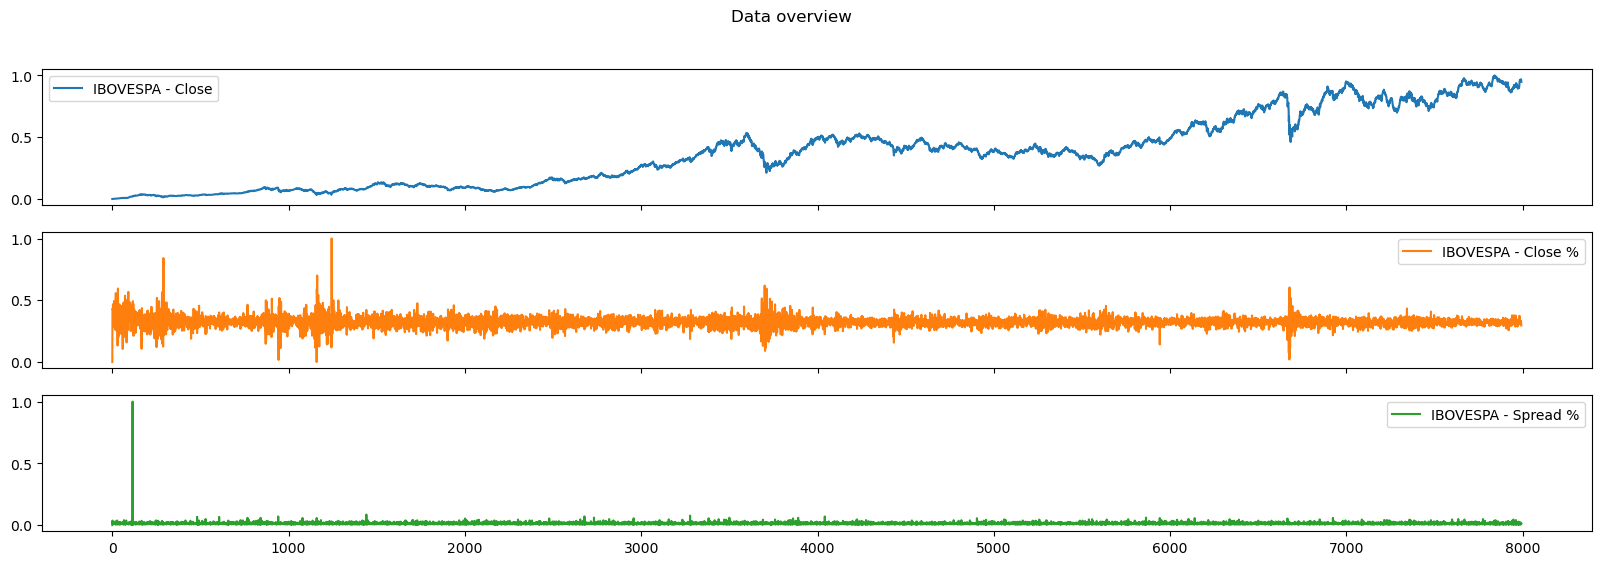

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

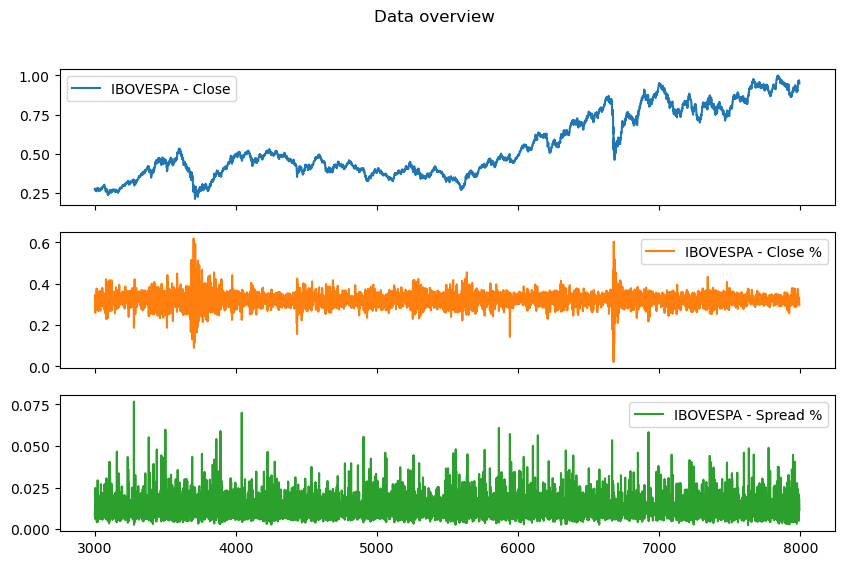

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 1
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Adjusted train size: 7602
Training data size: 7602
Validating data size: 261
Testing data size: 129


array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

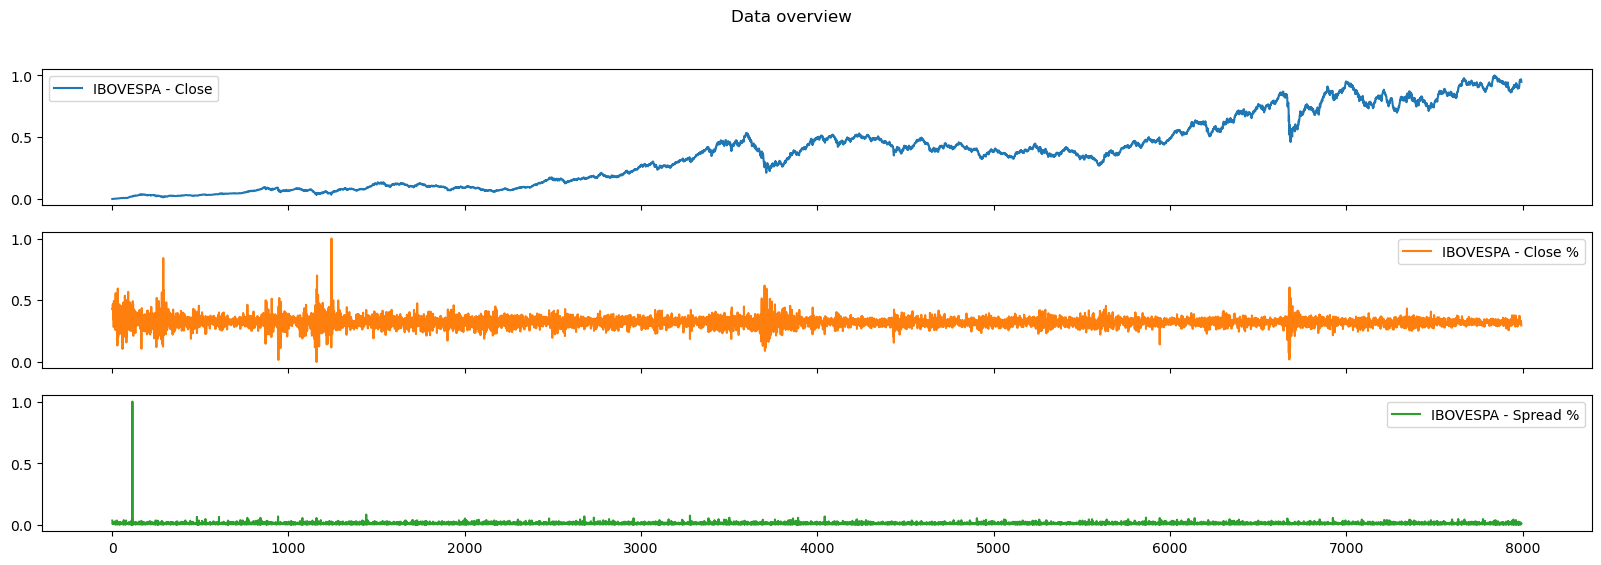

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7602, 261, 129, 7992)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 5
Input indices: [0 1 2 3]
Label indices: [4]
Label column name(s): ['IBOVESPA - Close']

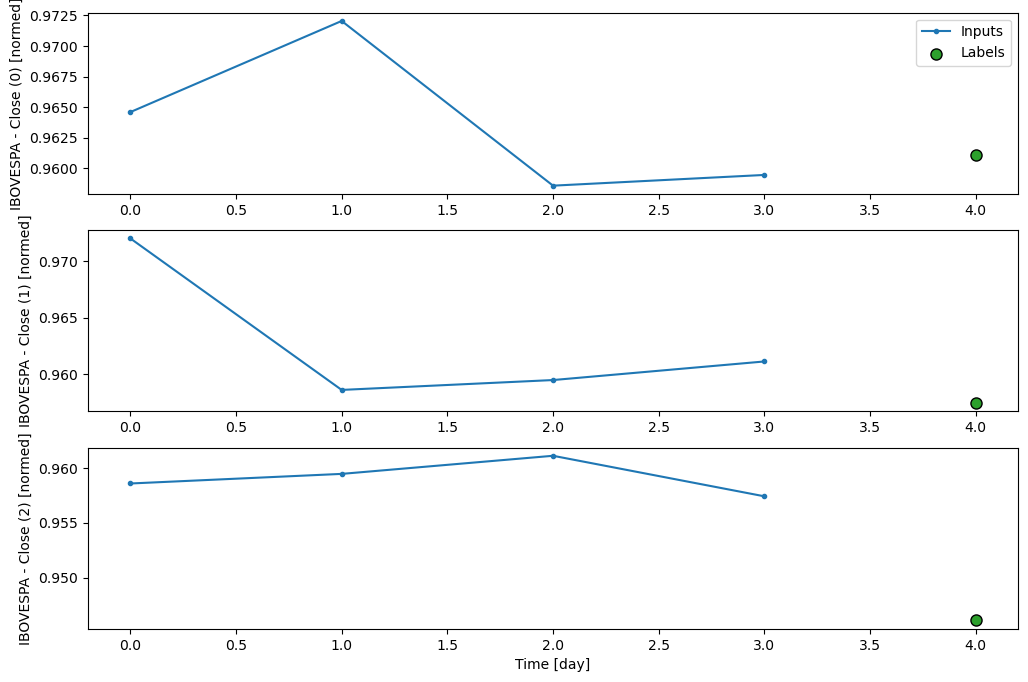

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 4, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

3

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 12:32 3s/step - loss: 0.0030 - mean_absolute_error: 0.0030 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 1.0882e-05 - root_mean_squared_error: 0.0033

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 118.4376 - mean_squared_error: 2.3489e-04 - root_mean_squared_error: 0.0144  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 95.4253 - mean_squared_error: 2.5000e-04 - root_mean_squared_error: 0.0153 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 79.8649 - mean_squared_error: 2.2319e-04 - root_mean_squared_error: 0.0146

 36/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 68.6607 - mean_squared_error: 2.0900e-04 - root_mean_squared_error: 0.0142

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 61.5311 - mean_squared_error: 2.0704e-04 - root_mean_squared_error: 0.0142

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 56.8011 - mean_squared_error: 2.1472e-04 - root_mean_squared_error: 0.0145

 64/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 52.9580 - mean_squared_error: 2.1977e-04 - root_mean_squared_error: 0.0146

 73/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 49.8138 - mean_squared_error: 2.2265e-04 - root_mean_squared_error: 0.0148

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 47.2150 - mean_squared_error: 2.2682e-04 - root_mean_squared_error: 0.0149

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 45.0636 - mean_squared_error: 2.4097e-04 - root_mean_squared_error: 0.0153

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 42.9791 - mean_squared_error: 2.5881e-04 - root_mean_squared_error: 0.0158

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 41.5356 - mean_squared_error: 2.9008e-04 - root_mean_squared_error: 0.0166

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 40.7069 - mean_squared_error: 3.1487e-04 - root_mean_squared_error: 0.0172

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0138 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 39.9510 - mean_squared_error: 3.5123e-04 - root_mean_squared_error: 0.0179

126/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 39.0046 - mean_squared_error: 4.2510e-04 - root_mean_squared_error: 0.0191

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 38.0619 - mean_squared_error: 5.6492e-04 - root_mean_squared_error: 0.0211

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 37.1906 - mean_squared_error: 6.9441e-04 - root_mean_squared_error: 0.0230

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 36.2865 - mean_squared_error: 8.3004e-04 - root_mean_squared_error: 0.0248

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 35.4412 - mean_squared_error: 9.4702e-04 - root_mean_squared_error: 0.0265

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 34.6560 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0279    

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 33.9293 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0293

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 33.2595 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0305

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 32.5802 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0318

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 31.9980 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0329

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 31.3922 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0342

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0248 - mean_absolute_error: 0.0248 - mean_absolute_percentage_error: 30.8321 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0356

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 30.3488 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

238/238 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 30.1401 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0373 - val_loss: 0.0967 - val_mean_absolute_error: 0.0967 - val_mean_absolute_percentage_error: 10.3096 - val_mean_squared_error: 0.0106 - val_root_mean_squared_error: 0.1030 - lr: 0.0098


Epoch 2/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - loss: 0.6810 - mean_absolute_error: 0.6810 - mean_absolute_percentage_error: 29390.2188 - mean_squared_error: 0.4638 - root_mean_squared_error: 0.6811

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6633 - mean_absolute_error: 0.6633 - mean_absolute_percentage_error: 13833.1182 - mean_squared_error: 0.4410 - root_mean_squared_error: 0.6638  

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5930 - mean_absolute_error: 0.5930 - mean_absolute_percentage_error: 9212.4551 - mean_squared_error: 0.3705 - root_mean_squared_error: 0.6053 

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5220 - mean_absolute_error: 0.5220 - mean_absolute_percentage_error: 7126.0034 - mean_squared_error: 0.3103 - root_mean_squared_error: 0.5491

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4642 - mean_absolute_error: 0.4642 - mean_absolute_percentage_error: 5882.1475 - mean_squared_error: 0.2670 - root_mean_squared_error: 0.5047

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4171 - mean_absolute_error: 0.4171 - mean_absolute_percentage_error: 5042.0981 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4692

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3791 - mean_absolute_error: 0.3791 - mean_absolute_percentage_error: 4432.1982 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4403

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3451 - mean_absolute_error: 0.3451 - mean_absolute_percentage_error: 3921.8254 - mean_squared_error: 0.1887 - root_mean_squared_error: 0.4139

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3199 - mean_absolute_error: 0.3199 - mean_absolute_percentage_error: 3562.6316 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3939

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 3269.7573 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3766

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 3025.8289 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3616

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 2819.1460 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3482

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 2641.5234 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3364

118/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 2471.1504 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3246

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2273 - mean_absolute_error: 0.2273 - mean_absolute_percentage_error: 2337.4902 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3153

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 2231.4297 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3077

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 2112.9351 - mean_squared_error: 0.1074 - root_mean_squared_error: 0.2990

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 2017.5717 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2918

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 1922.1602 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2844

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 1844.4109 - mean_squared_error: 0.0948 - root_mean_squared_error: 0.2783

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1837 - mean_absolute_error: 0.1837 - mean_absolute_percentage_error: 1773.3047 - mean_squared_error: 0.0914 - root_mean_squared_error: 0.2725

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 1708.0071 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2671

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1733 - mean_absolute_error: 0.1733 - mean_absolute_percentage_error: 1641.4062 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2616

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1690 - mean_absolute_error: 0.1690 - mean_absolute_percentage_error: 1586.1653 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2569

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1646 - mean_absolute_error: 0.1646 - mean_absolute_percentage_error: 1529.4070 - mean_squared_error: 0.0797 - root_mean_squared_error: 0.2521

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1609 - mean_absolute_error: 0.1609 - mean_absolute_percentage_error: 1482.0156 - mean_squared_error: 0.0774 - root_mean_squared_error: 0.2480

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1571 - mean_absolute_error: 0.1571 - mean_absolute_percentage_error: 1433.0157 - mean_squared_error: 0.0751 - root_mean_squared_error: 0.2437 - val_loss: 0.0320 - val_mean_absolute_error: 0.0320 - val_mean_absolute_percentage_error: 3.4170 - val_mean_squared_error: 0.0014 - val_root_mean_squared_error: 0.0368 - lr: 0.0095


Epoch 3/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 20059.3926 - mean_squared_error: 0.2163 - root_mean_squared_error: 0.4651

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4467 - mean_absolute_error: 0.4467 - mean_absolute_percentage_error: 8032.0718 - mean_squared_error: 0.2004 - root_mean_squared_error: 0.4474  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3957 - mean_absolute_error: 0.3957 - mean_absolute_percentage_error: 5746.6182 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.4077

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 4461.4575 - mean_squared_error: 0.1399 - root_mean_squared_error: 0.3673

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 3750.2922 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3390

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 3207.1831 - mean_squared_error: 0.1063 - root_mean_squared_error: 0.3141

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 2848.7717 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2959

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 2569.5051 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2806

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 2345.0391 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2676

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1957 - mean_absolute_error: 0.1957 - mean_absolute_percentage_error: 2141.6399 - mean_squared_error: 0.0741 - root_mean_squared_error: 0.2551

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1840 - mean_absolute_error: 0.1840 - mean_absolute_percentage_error: 1989.2957 - mean_squared_error: 0.0693 - root_mean_squared_error: 0.2453

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1727 - mean_absolute_error: 0.1727 - mean_absolute_percentage_error: 1845.8669 - mean_squared_error: 0.0647 - root_mean_squared_error: 0.2357

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1629 - mean_absolute_error: 0.1629 - mean_absolute_percentage_error: 1723.5896 - mean_squared_error: 0.0607 - root_mean_squared_error: 0.2272

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1552 - mean_absolute_error: 0.1552 - mean_absolute_percentage_error: 1627.8923 - mean_squared_error: 0.0575 - root_mean_squared_error: 0.2203

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1491 - mean_absolute_error: 0.1491 - mean_absolute_percentage_error: 1552.1696 - mean_squared_error: 0.0550 - root_mean_squared_error: 0.2147

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1435 - mean_absolute_error: 0.1435 - mean_absolute_percentage_error: 1483.8422 - mean_squared_error: 0.0528 - root_mean_squared_error: 0.2095

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1384 - mean_absolute_error: 0.1384 - mean_absolute_percentage_error: 1421.8481 - mean_squared_error: 0.0507 - root_mean_squared_error: 0.2047

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1332 - mean_absolute_error: 0.1332 - mean_absolute_percentage_error: 1358.5928 - mean_squared_error: 0.0486 - root_mean_squared_error: 0.1997

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1285 - mean_absolute_error: 0.1285 - mean_absolute_percentage_error: 1301.2440 - mean_squared_error: 0.0467 - root_mean_squared_error: 0.1950

175/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1248.9901 - mean_squared_error: 0.0449 - root_mean_squared_error: 0.1907

183/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1205 - mean_absolute_error: 0.1205 - mean_absolute_percentage_error: 1206.2749 - mean_squared_error: 0.0435 - root_mean_squared_error: 0.1871

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1172 - mean_absolute_error: 0.1172 - mean_absolute_percentage_error: 1166.6589 - mean_squared_error: 0.0421 - root_mean_squared_error: 0.1837

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1138 - mean_absolute_error: 0.1138 - mean_absolute_percentage_error: 1125.3793 - mean_squared_error: 0.0407 - root_mean_squared_error: 0.1802

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1109 - mean_absolute_error: 0.1109 - mean_absolute_percentage_error: 1091.2911 - mean_squared_error: 0.0395 - root_mean_squared_error: 0.1772

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1089 - mean_absolute_error: 0.1089 - mean_absolute_percentage_error: 1067.1802 - mean_squared_error: 0.0387 - root_mean_squared_error: 0.1750

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1070 - mean_absolute_error: 0.1070 - mean_absolute_percentage_error: 1044.2139 - mean_squared_error: 0.0379 - root_mean_squared_error: 0.1729

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1050 - mean_absolute_error: 0.1050 - mean_absolute_percentage_error: 1018.7593 - mean_squared_error: 0.0371 - root_mean_squared_error: 0.1707

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1030 - mean_absolute_error: 0.1030 - mean_absolute_percentage_error: 994.6330 - mean_squared_error: 0.0362 - root_mean_squared_error: 0.1685 

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1017 - mean_absolute_error: 0.1017 - mean_absolute_percentage_error: 978.1620 - mean_squared_error: 0.0357 - root_mean_squared_error: 0.1670 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332 - val_mean_absolute_percentage_error: 3.5342 - val_mean_squared_error: 0.0013 - val_root_mean_squared_error: 0.0366 - lr: 0.0093


Epoch 4/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.2174 - mean_absolute_error: 0.2174 - mean_absolute_percentage_error: 9366.2266 - mean_squared_error: 0.0473 - root_mean_squared_error: 0.2175

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 3831.2166 - mean_squared_error: 0.0368 - root_mean_squared_error: 0.1907 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1487 - mean_absolute_error: 0.1487 - mean_absolute_percentage_error: 2525.7959 - mean_squared_error: 0.0270 - root_mean_squared_error: 0.1606

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1241 - mean_absolute_error: 0.1241 - mean_absolute_percentage_error: 1933.7897 - mean_squared_error: 0.0215 - root_mean_squared_error: 0.1412

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1087 - mean_absolute_error: 0.1087 - mean_absolute_percentage_error: 1613.7686 - mean_squared_error: 0.0183 - root_mean_squared_error: 0.1287

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - mean_absolute_percentage_error: 1372.7323 - mean_squared_error: 0.0158 - root_mean_squared_error: 0.1183

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0873 - mean_absolute_error: 0.0873 - mean_absolute_percentage_error: 1215.0841 - mean_squared_error: 0.0141 - root_mean_squared_error: 0.1109

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0802 - mean_absolute_error: 0.0802 - mean_absolute_percentage_error: 1092.9868 - mean_squared_error: 0.0128 - root_mean_squared_error: 0.1047

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0743 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 995.3127 - mean_squared_error: 0.0117 - root_mean_squared_error: 0.0996 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0688 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 907.1566 - mean_squared_error: 0.0107 - root_mean_squared_error: 0.0946

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0647 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 841.3467 - mean_squared_error: 0.0100 - root_mean_squared_error: 0.0908

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0610 - mean_absolute_error: 0.0610 - mean_absolute_percentage_error: 785.2827 - mean_squared_error: 0.0094 - root_mean_squared_error: 0.0874

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - mean_absolute_error: 0.0576 - mean_absolute_percentage_error: 731.9114 - mean_squared_error: 0.0088 - root_mean_squared_error: 0.0841

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0548 - mean_absolute_error: 0.0548 - mean_absolute_percentage_error: 690.2782 - mean_squared_error: 0.0083 - root_mean_squared_error: 0.0815

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0524 - mean_absolute_error: 0.0524 - mean_absolute_percentage_error: 653.5509 - mean_squared_error: 0.0079 - root_mean_squared_error: 0.0790

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0503 - mean_absolute_error: 0.0503 - mean_absolute_percentage_error: 620.8839 - mean_squared_error: 0.0075 - root_mean_squared_error: 0.0768

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0484 - mean_absolute_error: 0.0484 - mean_absolute_percentage_error: 591.6249 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0748

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0465 - mean_absolute_error: 0.0465 - mean_absolute_percentage_error: 562.4753 - mean_squared_error: 0.0068 - root_mean_squared_error: 0.0728

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0450 - mean_absolute_error: 0.0450 - mean_absolute_percentage_error: 538.8128 - mean_squared_error: 0.0065 - root_mean_squared_error: 0.0711

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 514.9608 - mean_squared_error: 0.0063 - root_mean_squared_error: 0.0694

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0420 - mean_absolute_error: 0.0420 - mean_absolute_percentage_error: 493.3206 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0678

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0409 - mean_absolute_error: 0.0409 - mean_absolute_percentage_error: 475.4862 - mean_squared_error: 0.0058 - root_mean_squared_error: 0.0664

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0397 - mean_absolute_error: 0.0397 - mean_absolute_percentage_error: 457.2613 - mean_squared_error: 0.0056 - root_mean_squared_error: 0.0651

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 440.5089 - mean_squared_error: 0.0054 - root_mean_squared_error: 0.0638

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0378 - mean_absolute_error: 0.0378 - mean_absolute_percentage_error: 425.0510 - mean_squared_error: 0.0052 - root_mean_squared_error: 0.0627

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0370 - mean_absolute_error: 0.0370 - mean_absolute_percentage_error: 410.7396 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0616

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0369 - mean_absolute_error: 0.0369 - mean_absolute_percentage_error: 409.3686 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0615 - val_loss: 0.0564 - val_mean_absolute_error: 0.0564 - val_mean_absolute_percentage_error: 6.0400 - val_mean_squared_error: 0.0034 - val_root_mean_squared_error: 0.0585 - lr: 0.0090


Epoch 5/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.1370 - mean_absolute_error: 0.1370 - mean_absolute_percentage_error: 5908.3345 - mean_squared_error: 0.0188 - root_mean_squared_error: 0.1372

  7/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1208 - mean_absolute_error: 0.1208 - mean_absolute_percentage_error: 2899.2925 - mean_squared_error: 0.0152 - root_mean_squared_error: 0.1227 

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1008 - mean_absolute_error: 0.1008 - mean_absolute_percentage_error: 2040.9023 - mean_squared_error: 0.0118 - root_mean_squared_error: 0.1069

 17/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0920 - mean_absolute_error: 0.0920 - mean_absolute_percentage_error: 1733.3241 - mean_squared_error: 0.0104 - root_mean_squared_error: 0.0996

 22/238 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - mean_absolute_percentage_error: 1473.3635 - mean_squared_error: 0.0091 - root_mean_squared_error: 0.0925

 28/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 1259.1624 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0861

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0703 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 1084.1136 - mean_squared_error: 0.0070 - root_mean_squared_error: 0.0803

 41/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0658 - mean_absolute_error: 0.0658 - mean_absolute_percentage_error: 972.7581 - mean_squared_error: 0.0064 - root_mean_squared_error: 0.0762 

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0627 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 898.0057 - mean_squared_error: 0.0060 - root_mean_squared_error: 0.0733

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0593 - mean_absolute_error: 0.0593 - mean_absolute_percentage_error: 823.7363 - mean_squared_error: 0.0055 - root_mean_squared_error: 0.0702

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0573 - mean_absolute_error: 0.0573 - mean_absolute_percentage_error: 781.4117 - mean_squared_error: 0.0053 - root_mean_squared_error: 0.0684

 60/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0554 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 743.6934 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0667

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0541 - mean_absolute_error: 0.0541 - mean_absolute_percentage_error: 717.9764 - mean_squared_error: 0.0049 - root_mean_squared_error: 0.0655

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0520 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 679.2706 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0636

 75/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0494 - mean_absolute_error: 0.0494 - mean_absolute_percentage_error: 632.2975 - mean_squared_error: 0.0044 - root_mean_squared_error: 0.0613

 81/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0474 - mean_absolute_error: 0.0474 - mean_absolute_percentage_error: 597.4267 - mean_squared_error: 0.0041 - root_mean_squared_error: 0.0595

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0453 - mean_absolute_error: 0.0453 - mean_absolute_percentage_error: 561.7851 - mean_squared_error: 0.0039 - root_mean_squared_error: 0.0576

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0434 - mean_absolute_error: 0.0434 - mean_absolute_percentage_error: 530.5671 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0559

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 502.9717 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0544

108/238 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0404 - mean_absolute_error: 0.0404 - mean_absolute_percentage_error: 481.7310 - mean_squared_error: 0.0034 - root_mean_squared_error: 0.0531

115/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - mean_absolute_percentage_error: 459.3327 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0518 

122/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 439.1340 - mean_squared_error: 0.0031 - root_mean_squared_error: 0.0506

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 418.3347 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0493

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - mean_absolute_percentage_error: 401.8445 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0483

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0343 - mean_absolute_error: 0.0343 - mean_absolute_percentage_error: 384.6745 - mean_squared_error: 0.0028 - root_mean_squared_error: 0.0472

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0338 - mean_absolute_error: 0.0338 - mean_absolute_percentage_error: 376.6842 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0467

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - mean_absolute_percentage_error: 367.1987 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0461

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0327 - mean_absolute_error: 0.0327 - mean_absolute_percentage_error: 358.2274 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0455

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - mean_absolute_percentage_error: 349.7275 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0449

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0314 - mean_absolute_error: 0.0314 - mean_absolute_percentage_error: 338.5491 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0442

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 328.1318 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0435

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0301 - mean_absolute_error: 0.0301 - mean_absolute_percentage_error: 318.3976 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0428

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - mean_absolute_percentage_error: 309.2789 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0421

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0290 - mean_absolute_error: 0.0290 - mean_absolute_percentage_error: 300.7175 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0415

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 293.7837 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0410

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0281 - mean_absolute_error: 0.0281 - mean_absolute_percentage_error: 288.2690 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0406

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - mean_absolute_percentage_error: 279.9050 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0400

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 272.0584 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0395

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0267 - mean_absolute_error: 0.0267 - mean_absolute_percentage_error: 265.5793 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0390

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0263 - mean_absolute_error: 0.0263 - mean_absolute_percentage_error: 260.2918 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0386 - val_loss: 0.0107 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 1.1375 - val_mean_squared_error: 1.7012e-04 - val_root_mean_squared_error: 0.0130 - lr: 0.0088


Epoch 6/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 1516.1228 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0361

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0244 - mean_absolute_error: 0.0244 - mean_absolute_percentage_error: 643.0437 - mean_squared_error: 7.5283e-04 - root_mean_squared_error: 0.0270

 13/238 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 483.0140 - mean_squared_error: 6.1028e-04 - root_mean_squared_error: 0.0241

 18/238 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 394.1114 - mean_squared_error: 5.1928e-04 - root_mean_squared_error: 0.0221

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 318.0918 - mean_squared_error: 4.3450e-04 - root_mean_squared_error: 0.0200 

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 263.5455 - mean_squared_error: 3.7010e-04 - root_mean_squared_error: 0.0183

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 234.7378 - mean_squared_error: 3.3502e-04 - root_mean_squared_error: 0.0173

 45/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 212.3436 - mean_squared_error: 3.0746e-04 - root_mean_squared_error: 0.0165

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 191.6794 - mean_squared_error: 2.8204e-04 - root_mean_squared_error: 0.0158

 59/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 175.1104 - mean_squared_error: 2.6143e-04 - root_mean_squared_error: 0.0151

 65/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 163.2840 - mean_squared_error: 2.4643e-04 - root_mean_squared_error: 0.0147

 70/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 154.7278 - mean_squared_error: 2.3541e-04 - root_mean_squared_error: 0.0143

 78/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 142.9648 - mean_squared_error: 2.2002e-04 - root_mean_squared_error: 0.0138

 83/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 136.5831 - mean_squared_error: 2.1160e-04 - root_mean_squared_error: 0.0135

 88/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 130.8157 - mean_squared_error: 2.0402e-04 - root_mean_squared_error: 0.0132

 95/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 123.6100 - mean_squared_error: 1.9468e-04 - root_mean_squared_error: 0.0129

102/238 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 117.2492 - mean_squared_error: 1.8675e-04 - root_mean_squared_error: 0.0126

109/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 111.5859 - mean_squared_error: 1.7997e-04 - root_mean_squared_error: 0.0124

116/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 106.5061 - mean_squared_error: 1.7430e-04 - root_mean_squared_error: 0.0122

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 101.9298 - mean_squared_error: 1.7026e-04 - root_mean_squared_error: 0.0121

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 97.2264 - mean_squared_error: 1.6867e-04 - root_mean_squared_error: 0.0121 

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 93.4983 - mean_squared_error: 1.6825e-04 - root_mean_squared_error: 0.0121

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 90.5495 - mean_squared_error: 1.6782e-04 - root_mean_squared_error: 0.0121

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 89.1524 - mean_squared_error: 1.6759e-04 - root_mean_squared_error: 0.0121

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 86.4984 - mean_squared_error: 1.6706e-04 - root_mean_squared_error: 0.0121

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 83.6181 - mean_squared_error: 1.6635e-04 - root_mean_squared_error: 0.0122

166/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 81.3151 - mean_squared_error: 1.6565e-04 - root_mean_squared_error: 0.0122

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 78.8036 - mean_squared_error: 1.6492e-04 - root_mean_squared_error: 0.0122

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 76.7857 - mean_squared_error: 1.6424e-04 - root_mean_squared_error: 0.0121

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 74.8815 - mean_squared_error: 1.6359e-04 - root_mean_squared_error: 0.0121

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 72.7909 - mean_squared_error: 1.6302e-04 - root_mean_squared_error: 0.0121

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 70.5597 - mean_squared_error: 1.6306e-04 - root_mean_squared_error: 0.0122

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 68.2284 - mean_squared_error: 1.6363e-04 - root_mean_squared_error: 0.0122

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 66.0654 - mean_squared_error: 1.6484e-04 - root_mean_squared_error: 0.0123

227/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 64.0517 - mean_squared_error: 1.6622e-04 - root_mean_squared_error: 0.0124

237/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 61.9706 - mean_squared_error: 1.6791e-04 - root_mean_squared_error: 0.0124

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 61.5730 - mean_squared_error: 1.6822e-04 - root_mean_squared_error: 0.0125 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9616 - val_mean_squared_error: 1.2343e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0086


Epoch 7/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0894 - mean_absolute_error: 0.0894 - mean_absolute_percentage_error: 3851.0725 - mean_squared_error: 0.0080 - root_mean_squared_error: 0.0896

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0665 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 1525.9424 - mean_squared_error: 0.0051 - root_mean_squared_error: 0.0706 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0529 - mean_absolute_error: 0.0529 - mean_absolute_percentage_error: 1002.7419 - mean_squared_error: 0.0037 - root_mean_squared_error: 0.0588

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0466 - mean_absolute_error: 0.0466 - mean_absolute_percentage_error: 788.2159 - mean_squared_error: 0.0030 - root_mean_squared_error: 0.0528 

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - mean_absolute_percentage_error: 656.9860 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0486

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0386 - mean_absolute_error: 0.0386 - mean_absolute_percentage_error: 567.0508 - mean_squared_error: 0.0023 - root_mean_squared_error: 0.0453

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - mean_absolute_percentage_error: 494.5833 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0424

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 444.9546 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0402

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0306 - mean_absolute_error: 0.0306 - mean_absolute_percentage_error: 401.3823 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0381

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0294 - mean_absolute_error: 0.0294 - mean_absolute_percentage_error: 379.5132 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0370

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 360.1432 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0360

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0271 - mean_absolute_error: 0.0271 - mean_absolute_percentage_error: 340.1490 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0350

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 322.4749 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0340

109/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 306.7260 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0331

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 292.5952 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0323

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0236 - mean_absolute_error: 0.0236 - mean_absolute_percentage_error: 279.8438 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0316

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 266.7056 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0308

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 257.7169 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0303

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0219 - mean_absolute_error: 0.0219 - mean_absolute_percentage_error: 249.3772 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0298

147/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 244.1429 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0295

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 235.5449 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0290

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0206 - mean_absolute_error: 0.0206 - mean_absolute_percentage_error: 226.5035 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0285

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 219.1994 - mean_squared_error: 9.7542e-04 - root_mean_squared_error: 0.0281

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 212.3981 - mean_squared_error: 9.4876e-04 - root_mean_squared_error: 0.0276

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 206.9300 - mean_squared_error: 9.2730e-04 - root_mean_squared_error: 0.0273

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 200.9318 - mean_squared_error: 9.0375e-04 - root_mean_squared_error: 0.0269

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 195.3065 - mean_squared_error: 8.8176e-04 - root_mean_squared_error: 0.0266

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 190.0201 - mean_squared_error: 8.6142e-04 - root_mean_squared_error: 0.0262

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 185.0415 - mean_squared_error: 8.4262e-04 - root_mean_squared_error: 0.0259

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 180.3438 - mean_squared_error: 8.2526e-04 - root_mean_squared_error: 0.0257

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 177.1466 - mean_squared_error: 8.1358e-04 - root_mean_squared_error: 0.0255

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 174.6776 - mean_squared_error: 8.0457e-04 - root_mean_squared_error: 0.0253

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 171.6965 - mean_squared_error: 7.9376e-04 - root_mean_squared_error: 0.0252

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 168.8256 - mean_squared_error: 7.8337e-04 - root_mean_squared_error: 0.0250

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 167.1546 - mean_squared_error: 7.7731e-04 - root_mean_squared_error: 0.0249 - val_loss: 0.0089 - val_mean_absolute_error: 0.0089 - val_mean_absolute_percentage_error: 0.9557 - val_mean_squared_error: 1.2380e-04 - val_root_mean_squared_error: 0.0111 - lr: 0.0084


Epoch 8/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.0685 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 2949.6802 - mean_squared_error: 0.0047 - root_mean_squared_error: 0.0688

  8/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0527 - mean_absolute_error: 0.0527 - mean_absolute_percentage_error: 1313.9868 - mean_squared_error: 0.0032 - root_mean_squared_error: 0.0556 

 15/238 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0459 - mean_absolute_error: 0.0459 - mean_absolute_percentage_error: 920.7224 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0496 

 25/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0394 - mean_absolute_error: 0.0394 - mean_absolute_percentage_error: 671.8005 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0439

 34/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0352 - mean_absolute_error: 0.0352 - mean_absolute_percentage_error: 548.8654 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - mean_absolute_percentage_error: 460.6403 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0370

 53/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0293 - mean_absolute_error: 0.0293 - mean_absolute_percentage_error: 404.5997 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0348

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 357.8087 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0327

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 324.9288 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0312

 82/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 295.4847 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0297

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 273.6350 - mean_squared_error: 9.4346e-04 - root_mean_squared_error: 0.0286

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 253.2127 - mean_squared_error: 8.7932e-04 - root_mean_squared_error: 0.0274

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 237.5217 - mean_squared_error: 8.2962e-04 - root_mean_squared_error: 0.0265

117/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 226.7351 - mean_squared_error: 7.9552e-04 - root_mean_squared_error: 0.0259

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 215.6739 - mean_squared_error: 7.6092e-04 - root_mean_squared_error: 0.0253

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 204.5843 - mean_squared_error: 7.2671e-04 - root_mean_squared_error: 0.0246

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 194.6942 - mean_squared_error: 6.9648e-04 - root_mean_squared_error: 0.0241

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 184.8806 - mean_squared_error: 6.6662e-04 - root_mean_squared_error: 0.0235

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 176.9395 - mean_squared_error: 6.4222e-04 - root_mean_squared_error: 0.0230

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 168.9579 - mean_squared_error: 6.1756e-04 - root_mean_squared_error: 0.0226

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 161.7356 - mean_squared_error: 5.9511e-04 - root_mean_squared_error: 0.0221

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 155.7963 - mean_squared_error: 5.7662e-04 - root_mean_squared_error: 0.0217

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 149.7393 - mean_squared_error: 5.5792e-04 - root_mean_squared_error: 0.0214

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 144.7182 - mean_squared_error: 5.4290e-04 - root_mean_squared_error: 0.0211

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 139.5624 - mean_squared_error: 5.2895e-04 - root_mean_squared_error: 0.0208

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 135.2613 - mean_squared_error: 5.1906e-04 - root_mean_squared_error: 0.0206

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 130.8167 - mean_squared_error: 5.0950e-04 - root_mean_squared_error: 0.0205 - val_loss: 0.0103 - val_mean_absolute_error: 0.0103 - val_mean_absolute_percentage_error: 1.1013 - val_mean_squared_error: 1.5533e-04 - val_root_mean_squared_error: 0.0125 - lr: 0.0082


Epoch 9/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0592 - mean_absolute_error: 0.0592 - mean_absolute_percentage_error: 2546.3672 - mean_squared_error: 0.0035 - root_mean_squared_error: 0.0594

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - mean_absolute_percentage_error: 947.8732 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0448  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - mean_absolute_percentage_error: 660.4334 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0386

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - mean_absolute_percentage_error: 519.7783 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0278 - mean_absolute_error: 0.0278 - mean_absolute_percentage_error: 433.4033 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0321

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0252 - mean_absolute_error: 0.0252 - mean_absolute_percentage_error: 368.7204 - mean_squared_error: 9.8041e-04 - root_mean_squared_error: 0.0297

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 326.5515 - mean_squared_error: 8.8246e-04 - root_mean_squared_error: 0.0280

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 290.7849 - mean_squared_error: 7.9699e-04 - root_mean_squared_error: 0.0265

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 265.3671 - mean_squared_error: 7.3485e-04 - root_mean_squared_error: 0.0253

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 242.3753 - mean_squared_error: 6.7765e-04 - root_mean_squared_error: 0.0242

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 225.1725 - mean_squared_error: 6.3431e-04 - root_mean_squared_error: 0.0233

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 - mean_absolute_error: 0.0176 - mean_absolute_percentage_error: 208.9877 - mean_squared_error: 5.9326e-04 - root_mean_squared_error: 0.0224

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 196.4836 - mean_squared_error: 5.6157e-04 - root_mean_squared_error: 0.0217

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 184.4171 - mean_squared_error: 5.3208e-04 - root_mean_squared_error: 0.0211

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 174.8915 - mean_squared_error: 5.0969e-04 - root_mean_squared_error: 0.0206

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 165.5156 - mean_squared_error: 4.8795e-04 - root_mean_squared_error: 0.0202

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 157.9839 - mean_squared_error: 4.7045e-04 - root_mean_squared_error: 0.0198

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 150.4594 - mean_squared_error: 4.5274e-04 - root_mean_squared_error: 0.0194

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 144.3350 - mean_squared_error: 4.3813e-04 - root_mean_squared_error: 0.0191

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 138.7394 - mean_squared_error: 4.2463e-04 - root_mean_squared_error: 0.0188

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 133.6045 - mean_squared_error: 4.1213e-04 - root_mean_squared_error: 0.0185

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 128.8732 - mean_squared_error: 4.0054e-04 - root_mean_squared_error: 0.0182

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 124.4986 - mean_squared_error: 3.8981e-04 - root_mean_squared_error: 0.0180

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 120.4418 - mean_squared_error: 3.8033e-04 - root_mean_squared_error: 0.0178

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 116.6676 - mean_squared_error: 3.7170e-04 - root_mean_squared_error: 0.0176

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 113.1461 - mean_squared_error: 3.6367e-04 - root_mean_squared_error: 0.0174

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 111.2904 - mean_squared_error: 3.5946e-04 - root_mean_squared_error: 0.0173 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6821 - val_mean_squared_error: 5.9985e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0080


Epoch 10/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0415 - mean_absolute_error: 0.0415 - mean_absolute_percentage_error: 1774.8584 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0417

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0287 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 687.4735 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0311  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 453.9294 - mean_squared_error: 7.4860e-04 - root_mean_squared_error: 0.0267

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 358.5454 - mean_squared_error: 6.3879e-04 - root_mean_squared_error: 0.0246

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 294.9995 - mean_squared_error: 5.6150e-04 - root_mean_squared_error: 0.0230

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 252.9077 - mean_squared_error: 5.0470e-04 - root_mean_squared_error: 0.0217

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0180 - mean_absolute_error: 0.0180 - mean_absolute_percentage_error: 225.1008 - mean_squared_error: 4.6320e-04 - root_mean_squared_error: 0.0207

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 201.2811 - mean_squared_error: 4.2503e-04 - root_mean_squared_error: 0.0198

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 184.2150 - mean_squared_error: 3.9618e-04 - root_mean_squared_error: 0.0190

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 168.6863 - mean_squared_error: 3.6890e-04 - root_mean_squared_error: 0.0183

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 157.0128 - mean_squared_error: 3.4776e-04 - root_mean_squared_error: 0.0177

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 147.0119 - mean_squared_error: 3.2929e-04 - root_mean_squared_error: 0.0172

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 138.3376 - mean_squared_error: 3.1320e-04 - root_mean_squared_error: 0.0167

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 129.9518 - mean_squared_error: 2.9789e-04 - root_mean_squared_error: 0.0162

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 123.3175 - mean_squared_error: 2.8572e-04 - root_mean_squared_error: 0.0159

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 116.7774 - mean_squared_error: 2.7361e-04 - root_mean_squared_error: 0.0155

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 111.5183 - mean_squared_error: 2.6382e-04 - root_mean_squared_error: 0.0152

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 106.2607 - mean_squared_error: 2.5394e-04 - root_mean_squared_error: 0.0149

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 101.9795 - mean_squared_error: 2.4585e-04 - root_mean_squared_error: 0.0146

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 97.6520 - mean_squared_error: 2.3763e-04 - root_mean_squared_error: 0.0144 

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 94.0925 - mean_squared_error: 2.3086e-04 - root_mean_squared_error: 0.0142

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 90.4612 - mean_squared_error: 2.2395e-04 - root_mean_squared_error: 0.0139

209/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 87.4494 - mean_squared_error: 2.1833e-04 - root_mean_squared_error: 0.0137

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 84.3555 - mean_squared_error: 2.1313e-04 - root_mean_squared_error: 0.0136

228/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 81.7719 - mean_squared_error: 2.0890e-04 - root_mean_squared_error: 0.0135

238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 79.1002 - mean_squared_error: 2.0462e-04 - root_mean_squared_error: 0.0133

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 78.8441 - mean_squared_error: 2.0422e-04 - root_mean_squared_error: 0.0133 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6312 - val_mean_squared_error: 5.2579e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0078


Epoch 11/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0385 - mean_absolute_error: 0.0385 - mean_absolute_percentage_error: 1646.0999 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0261 - mean_absolute_error: 0.0261 - mean_absolute_percentage_error: 671.6179 - mean_squared_error: 8.5981e-04 - root_mean_squared_error: 0.0287

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0202 - mean_absolute_error: 0.0202 - mean_absolute_percentage_error: 438.1128 - mean_squared_error: 5.9480e-04 - root_mean_squared_error: 0.0234

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 326.9952 - mean_squared_error: 4.5937e-04 - root_mean_squared_error: 0.0203

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - mean_absolute_percentage_error: 269.9004 - mean_squared_error: 3.8804e-04 - root_mean_squared_error: 0.0185

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 231.6365 - mean_squared_error: 3.3945e-04 - root_mean_squared_error: 0.0172

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 201.2248 - mean_squared_error: 2.9985e-04 - root_mean_squared_error: 0.0160

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 180.5772 - mean_squared_error: 2.7229e-04 - root_mean_squared_error: 0.0152

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 162.5613 - mean_squared_error: 2.4775e-04 - root_mean_squared_error: 0.0144

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 149.4627 - mean_squared_error: 2.2966e-04 - root_mean_squared_error: 0.0138

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 137.4124 - mean_squared_error: 2.1286e-04 - root_mean_squared_error: 0.0133

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 129.2223 - mean_squared_error: 2.0140e-04 - root_mean_squared_error: 0.0129

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 121.2150 - mean_squared_error: 1.9027e-04 - root_mean_squared_error: 0.0125

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 114.2424 - mean_squared_error: 1.8098e-04 - root_mean_squared_error: 0.0122

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 108.1104 - mean_squared_error: 1.7309e-04 - root_mean_squared_error: 0.0119

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 102.6678 - mean_squared_error: 1.6613e-04 - root_mean_squared_error: 0.0116

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 97.2925 - mean_squared_error: 1.5935e-04 - root_mean_squared_error: 0.0114 

157/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 92.9632 - mean_squared_error: 1.5398e-04 - root_mean_squared_error: 0.0112

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 88.6287 - mean_squared_error: 1.4861e-04 - root_mean_squared_error: 0.0110

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 85.0953 - mean_squared_error: 1.4430e-04 - root_mean_squared_error: 0.0109

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 81.8630 - mean_squared_error: 1.4043e-04 - root_mean_squared_error: 0.0107

194/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 78.8934 - mean_squared_error: 1.3701e-04 - root_mean_squared_error: 0.0106

203/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 76.1549 - mean_squared_error: 1.3412e-04 - root_mean_squared_error: 0.0105

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 73.6211 - mean_squared_error: 1.3193e-04 - root_mean_squared_error: 0.0105

222/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 71.0191 - mean_squared_error: 1.3053e-04 - root_mean_squared_error: 0.0104

231/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0076 - mean_absolute_error: 0.0076 - mean_absolute_percentage_error: 68.8466 - mean_squared_error: 1.2962e-04 - root_mean_squared_error: 0.0104

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 67.0365 - mean_squared_error: 1.2893e-04 - root_mean_squared_error: 0.0104 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6532 - val_mean_squared_error: 5.6449e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0076


Epoch 12/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0536 - mean_absolute_error: 0.0536 - mean_absolute_percentage_error: 2299.8452 - mean_squared_error: 0.0029 - root_mean_squared_error: 0.0537

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 900.2274 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0407  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0297 - mean_absolute_error: 0.0297 - mean_absolute_percentage_error: 606.6282 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0338

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0246 - mean_absolute_error: 0.0246 - mean_absolute_percentage_error: 457.9149 - mean_squared_error: 9.5793e-04 - root_mean_squared_error: 0.0294

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0212 - mean_absolute_error: 0.0212 - mean_absolute_percentage_error: 372.5997 - mean_squared_error: 7.9263e-04 - root_mean_squared_error: 0.0264

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 316.7120 - mean_squared_error: 6.8244e-04 - root_mean_squared_error: 0.0242

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 280.2970 - mean_squared_error: 6.0966e-04 - root_mean_squared_error: 0.0227

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 252.1458 - mean_squared_error: 5.5260e-04 - root_mean_squared_error: 0.0215

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 229.6471 - mean_squared_error: 5.0639e-04 - root_mean_squared_error: 0.0205

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 209.3529 - mean_squared_error: 4.6431e-04 - root_mean_squared_error: 0.0195

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 194.2091 - mean_squared_error: 4.3270e-04 - root_mean_squared_error: 0.0187

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 179.9932 - mean_squared_error: 4.0292e-04 - root_mean_squared_error: 0.0180

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 167.9062 - mean_squared_error: 3.7778e-04 - root_mean_squared_error: 0.0173

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 158.4723 - mean_squared_error: 3.5864e-04 - root_mean_squared_error: 0.0169

134/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 149.2786 - mean_squared_error: 3.4027e-04 - root_mean_squared_error: 0.0164

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 141.9603 - mean_squared_error: 3.2597e-04 - root_mean_squared_error: 0.0160

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 135.3980 - mean_squared_error: 3.1351e-04 - root_mean_squared_error: 0.0157

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 129.4736 - mean_squared_error: 3.0219e-04 - root_mean_squared_error: 0.0154

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 123.5296 - mean_squared_error: 2.9085e-04 - root_mean_squared_error: 0.0151

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 118.6741 - mean_squared_error: 2.8160e-04 - root_mean_squared_error: 0.0149

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 114.2237 - mean_squared_error: 2.7315e-04 - root_mean_squared_error: 0.0147

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 110.1282 - mean_squared_error: 2.6552e-04 - root_mean_squared_error: 0.0145

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 105.9437 - mean_squared_error: 2.5813e-04 - root_mean_squared_error: 0.0143

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 102.4690 - mean_squared_error: 2.5273e-04 - root_mean_squared_error: 0.0142

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 99.9363 - mean_squared_error: 2.4898e-04 - root_mean_squared_error: 0.0141 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 96.8768 - mean_squared_error: 2.4461e-04 - root_mean_squared_error: 0.0140

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 94.9502 - mean_squared_error: 2.4189e-04 - root_mean_squared_error: 0.0139 - val_loss: 0.0094 - val_mean_absolute_error: 0.0094 - val_mean_absolute_percentage_error: 1.0018 - val_mean_squared_error: 1.2854e-04 - val_root_mean_squared_error: 0.0113 - lr: 0.0074


Epoch 13/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0634 - mean_absolute_error: 0.0634 - mean_absolute_percentage_error: 2720.2805 - mean_squared_error: 0.0040 - root_mean_squared_error: 0.0634

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0467 - mean_absolute_error: 0.0467 - mean_absolute_percentage_error: 1076.8713 - mean_squared_error: 0.0025 - root_mean_squared_error: 0.0495 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - mean_absolute_percentage_error: 731.5422 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0419 

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - mean_absolute_percentage_error: 555.7297 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0368

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0288 - mean_absolute_error: 0.0288 - mean_absolute_percentage_error: 462.3174 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0336

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 392.6876 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0310

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 347.3968 - mean_squared_error: 9.7152e-04 - root_mean_squared_error: 0.0291

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 309.0151 - mean_squared_error: 8.7301e-04 - root_mean_squared_error: 0.0274

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 281.7570 - mean_squared_error: 8.0186e-04 - root_mean_squared_error: 0.0261

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0194 - mean_absolute_error: 0.0194 - mean_absolute_percentage_error: 257.1370 - mean_squared_error: 7.3691e-04 - root_mean_squared_error: 0.0249

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 238.7411 - mean_squared_error: 6.8804e-04 - root_mean_squared_error: 0.0239

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0175 - mean_absolute_error: 0.0175 - mean_absolute_percentage_error: 221.4548 - mean_squared_error: 6.4207e-04 - root_mean_squared_error: 0.0230

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 208.1115 - mean_squared_error: 6.0673e-04 - root_mean_squared_error: 0.0223

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 195.2382 - mean_squared_error: 5.7314e-04 - root_mean_squared_error: 0.0216

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 185.0768 - mean_squared_error: 5.4693e-04 - root_mean_squared_error: 0.0211

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 175.0787 - mean_squared_error: 5.2127e-04 - root_mean_squared_error: 0.0205

152/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 167.0524 - mean_squared_error: 5.0079e-04 - root_mean_squared_error: 0.0201

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 159.0375 - mean_squared_error: 4.8018e-04 - root_mean_squared_error: 0.0197

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 152.5187 - mean_squared_error: 4.6338e-04 - root_mean_squared_error: 0.0193

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 146.5659 - mean_squared_error: 4.4798e-04 - root_mean_squared_error: 0.0190

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 141.1055 - mean_squared_error: 4.3380e-04 - root_mean_squared_error: 0.0186

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 136.0766 - mean_squared_error: 4.2072e-04 - root_mean_squared_error: 0.0183

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 131.4289 - mean_squared_error: 4.0874e-04 - root_mean_squared_error: 0.0181

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 127.1211 - mean_squared_error: 3.9841e-04 - root_mean_squared_error: 0.0178

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 122.6876 - mean_squared_error: 3.8829e-04 - root_mean_squared_error: 0.0176

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 118.9800 - mean_squared_error: 3.7999e-04 - root_mean_squared_error: 0.0175

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 117.4113 - mean_squared_error: 3.7649e-04 - root_mean_squared_error: 0.0174 - val_loss: 0.0117 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 1.2495 - val_mean_squared_error: 1.8311e-04 - val_root_mean_squared_error: 0.0135 - lr: 0.0072


Epoch 14/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0507 - mean_absolute_error: 0.0507 - mean_absolute_percentage_error: 2177.1711 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0508

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0368 - mean_absolute_error: 0.0368 - mean_absolute_percentage_error: 857.4324 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0393  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - mean_absolute_percentage_error: 569.8851 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0266 - mean_absolute_error: 0.0266 - mean_absolute_percentage_error: 447.9596 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 366.2680 - mean_squared_error: 8.4387e-04 - root_mean_squared_error: 0.0278

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 316.8257 - mean_squared_error: 7.4331e-04 - root_mean_squared_error: 0.0259

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.0192 - mean_absolute_percentage_error: 276.8342 - mean_squared_error: 6.5922e-04 - root_mean_squared_error: 0.0242

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 249.3719 - mean_squared_error: 5.9999e-04 - root_mean_squared_error: 0.0229

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 225.2211 - mean_squared_error: 5.4693e-04 - root_mean_squared_error: 0.0217

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 211.2008 - mean_squared_error: 5.1574e-04 - root_mean_squared_error: 0.0210

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 195.7993 - mean_squared_error: 4.8121e-04 - root_mean_squared_error: 0.0202

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 182.7107 - mean_squared_error: 4.5181e-04 - root_mean_squared_error: 0.0195

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 170.2775 - mean_squared_error: 4.2413e-04 - root_mean_squared_error: 0.0188

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 160.5970 - mean_squared_error: 4.0321e-04 - root_mean_squared_error: 0.0183

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 151.1950 - mean_squared_error: 3.8455e-04 - root_mean_squared_error: 0.0179

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 143.7247 - mean_squared_error: 3.7030e-04 - root_mean_squared_error: 0.0175

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 137.0314 - mean_squared_error: 3.5743e-04 - root_mean_squared_error: 0.0172

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 130.9952 - mean_squared_error: 3.4565e-04 - root_mean_squared_error: 0.0170

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 124.9440 - mean_squared_error: 3.3367e-04 - root_mean_squared_error: 0.0167

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 120.0050 - mean_squared_error: 3.2380e-04 - root_mean_squared_error: 0.0164

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 115.4817 - mean_squared_error: 3.1473e-04 - root_mean_squared_error: 0.0162

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 110.8807 - mean_squared_error: 3.0564e-04 - root_mean_squared_error: 0.0160

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 107.0755 - mean_squared_error: 2.9842e-04 - root_mean_squared_error: 0.0158

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 103.1743 - mean_squared_error: 2.9147e-04 - root_mean_squared_error: 0.0156

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 99.9234 - mean_squared_error: 2.8594e-04 - root_mean_squared_error: 0.0155 

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 96.8918 - mean_squared_error: 2.8084e-04 - root_mean_squared_error: 0.0154

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 94.9822 - mean_squared_error: 2.7765e-04 - root_mean_squared_error: 0.0153 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6574 - val_mean_squared_error: 5.7594e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0070


Epoch 15/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - mean_absolute_percentage_error: 2107.5186 - mean_squared_error: 0.0024 - root_mean_squared_error: 0.0492

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - mean_absolute_percentage_error: 787.0676 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0375  

 21/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0296 - mean_absolute_error: 0.0296 - mean_absolute_percentage_error: 535.8245 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0328

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 425.2583 - mean_squared_error: 9.3661e-04 - root_mean_squared_error: 0.0296

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 356.0750 - mean_squared_error: 8.0713e-04 - root_mean_squared_error: 0.0273

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 303.8726 - mean_squared_error: 7.0428e-04 - root_mean_squared_error: 0.0253

 59/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0191 - mean_absolute_error: 0.0191 - mean_absolute_percentage_error: 266.3372 - mean_squared_error: 6.2743e-04 - root_mean_squared_error: 0.0237

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0178 - mean_absolute_error: 0.0178 - mean_absolute_percentage_error: 240.4146 - mean_squared_error: 5.7280e-04 - root_mean_squared_error: 0.0225

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0166 - mean_absolute_error: 0.0166 - mean_absolute_percentage_error: 217.4931 - mean_squared_error: 5.2341e-04 - root_mean_squared_error: 0.0213

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - mean_absolute_percentage_error: 200.6543 - mean_squared_error: 4.8652e-04 - root_mean_squared_error: 0.0205

 97/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 185.0454 - mean_squared_error: 4.5193e-04 - root_mean_squared_error: 0.0196

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 173.1357 - mean_squared_error: 4.2537e-04 - root_mean_squared_error: 0.0190

116/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 161.7527 - mean_squared_error: 4.0016e-04 - root_mean_squared_error: 0.0183

125/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 152.8457 - mean_squared_error: 3.8081e-04 - root_mean_squared_error: 0.0178

135/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 144.1457 - mean_squared_error: 3.6207e-04 - root_mean_squared_error: 0.0173

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 137.2059 - mean_squared_error: 3.4730e-04 - root_mean_squared_error: 0.0170

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 130.9717 - mean_squared_error: 3.3419e-04 - root_mean_squared_error: 0.0166

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 125.3350 - mean_squared_error: 3.2225e-04 - root_mean_squared_error: 0.0163

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 119.6717 - mean_squared_error: 3.1024e-04 - root_mean_squared_error: 0.0160

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 115.0392 - mean_squared_error: 3.0039e-04 - root_mean_squared_error: 0.0157

191/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 110.3372 - mean_squared_error: 2.9042e-04 - root_mean_squared_error: 0.0154

200/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 106.4558 - mean_squared_error: 2.8231e-04 - root_mean_squared_error: 0.0152

207/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 103.6405 - mean_squared_error: 2.7662e-04 - root_mean_squared_error: 0.0151

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 100.6200 - mean_squared_error: 2.7100e-04 - root_mean_squared_error: 0.0149

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 97.1087 - mean_squared_error: 2.6479e-04 - root_mean_squared_error: 0.0148 

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 94.1727 - mean_squared_error: 2.5970e-04 - root_mean_squared_error: 0.0146

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 92.6257 - mean_squared_error: 2.5704e-04 - root_mean_squared_error: 0.0146 - val_loss: 0.0061 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 0.6605 - val_mean_squared_error: 5.8471e-05 - val_root_mean_squared_error: 0.0076 - lr: 0.0069


Epoch 16/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0516 - mean_absolute_error: 0.0516 - mean_absolute_percentage_error: 2215.2432 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0517

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - mean_absolute_percentage_error: 874.7797 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0401  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - mean_absolute_percentage_error: 579.0577 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_absolute_percentage_error: 455.1154 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0306

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 379.0341 - mean_squared_error: 8.6326e-04 - root_mean_squared_error: 0.0281

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0217 - mean_absolute_error: 0.0217 - mean_absolute_percentage_error: 322.1910 - mean_squared_error: 7.4881e-04 - root_mean_squared_error: 0.0259

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0200 - mean_absolute_error: 0.0200 - mean_absolute_percentage_error: 285.1429 - mean_squared_error: 6.7159e-04 - root_mean_squared_error: 0.0244

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0185 - mean_absolute_error: 0.0185 - mean_absolute_percentage_error: 253.7226 - mean_squared_error: 6.0444e-04 - root_mean_squared_error: 0.0229

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 231.4054 - mean_squared_error: 5.5586e-04 - root_mean_squared_error: 0.0219

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0163 - mean_absolute_error: 0.0163 - mean_absolute_percentage_error: 213.0707 - mean_squared_error: 5.1540e-04 - root_mean_squared_error: 0.0210

 94/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 197.7050 - mean_squared_error: 4.8116e-04 - root_mean_squared_error: 0.0201

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 183.2826 - mean_squared_error: 4.4883e-04 - root_mean_squared_error: 0.0194

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 172.1626 - mean_squared_error: 4.2394e-04 - root_mean_squared_error: 0.0188

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 161.4476 - mean_squared_error: 4.0059e-04 - root_mean_squared_error: 0.0182

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 153.0009 - mean_squared_error: 3.8269e-04 - root_mean_squared_error: 0.0177

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 145.4818 - mean_squared_error: 3.6687e-04 - root_mean_squared_error: 0.0174

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 138.7414 - mean_squared_error: 3.5282e-04 - root_mean_squared_error: 0.0170

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 132.6588 - mean_squared_error: 3.4003e-04 - root_mean_squared_error: 0.0167

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 127.1394 - mean_squared_error: 3.2835e-04 - root_mean_squared_error: 0.0164

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 122.1066 - mean_squared_error: 3.1764e-04 - root_mean_squared_error: 0.0161

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 117.0086 - mean_squared_error: 3.0678e-04 - root_mean_squared_error: 0.0158

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 112.8073 - mean_squared_error: 2.9786e-04 - root_mean_squared_error: 0.0156

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 108.5147 - mean_squared_error: 2.8890e-04 - root_mean_squared_error: 0.0153

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 104.9508 - mean_squared_error: 2.8208e-04 - root_mean_squared_error: 0.0152

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 101.2844 - mean_squared_error: 2.7563e-04 - root_mean_squared_error: 0.0150

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 98.2191 - mean_squared_error: 2.7037e-04 - root_mean_squared_error: 0.0149 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 96.6039 - mean_squared_error: 2.6761e-04 - root_mean_squared_error: 0.0148 - val_loss: 0.0110 - val_mean_absolute_error: 0.0110 - val_mean_absolute_percentage_error: 1.1851 - val_mean_squared_error: 1.6592e-04 - val_root_mean_squared_error: 0.0129 - lr: 0.0067


Epoch 17/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0464 - mean_absolute_error: 0.0464 - mean_absolute_percentage_error: 1988.1499 - mean_squared_error: 0.0022 - root_mean_squared_error: 0.0464

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0336 - mean_absolute_error: 0.0336 - mean_absolute_percentage_error: 783.9159 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0359  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0285 - mean_absolute_error: 0.0285 - mean_absolute_percentage_error: 521.8692 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0312

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 412.7764 - mean_squared_error: 8.6292e-04 - root_mean_squared_error: 0.0286

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0234 - mean_absolute_error: 0.0234 - mean_absolute_percentage_error: 339.4114 - mean_squared_error: 7.4504e-04 - root_mean_squared_error: 0.0264

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 294.5264 - mean_squared_error: 6.6510e-04 - root_mean_squared_error: 0.0248

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 258.0031 - mean_squared_error: 5.9601e-04 - root_mean_squared_error: 0.0233

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 235.3358 - mean_squared_error: 5.5129e-04 - root_mean_squared_error: 0.0223

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 216.7425 - mean_squared_error: 5.1359e-04 - root_mean_squared_error: 0.0214

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 199.4038 - mean_squared_error: 4.7768e-04 - root_mean_squared_error: 0.0206

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 184.9150 - mean_squared_error: 4.4725e-04 - root_mean_squared_error: 0.0198

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 172.6040 - mean_squared_error: 4.2123e-04 - root_mean_squared_error: 0.0192

108/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 164.2258 - mean_squared_error: 4.0351e-04 - root_mean_squared_error: 0.0187

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 157.7358 - mean_squared_error: 3.8991e-04 - root_mean_squared_error: 0.0184

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 151.7976 - mean_squared_error: 3.7770e-04 - root_mean_squared_error: 0.0181

127/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 145.4779 - mean_squared_error: 3.6535e-04 - root_mean_squared_error: 0.0177

136/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 138.1710 - mean_squared_error: 3.5166e-04 - root_mean_squared_error: 0.0174

146/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 130.9555 - mean_squared_error: 3.3817e-04 - root_mean_squared_error: 0.0171

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 125.1425 - mean_squared_error: 3.2714e-04 - root_mean_squared_error: 0.0168

165/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 119.3211 - mean_squared_error: 3.1589e-04 - root_mean_squared_error: 0.0165

174/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 114.5744 - mean_squared_error: 3.0664e-04 - root_mean_squared_error: 0.0162

184/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 109.7702 - mean_squared_error: 2.9718e-04 - root_mean_squared_error: 0.0160

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 106.2387 - mean_squared_error: 2.9028e-04 - root_mean_squared_error: 0.0158

201/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 102.5574 - mean_squared_error: 2.8328e-04 - root_mean_squared_error: 0.0156

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 99.1496 - mean_squared_error: 2.7702e-04 - root_mean_squared_error: 0.0154 

219/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 95.9855 - mean_squared_error: 2.7158e-04 - root_mean_squared_error: 0.0153

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 93.6753 - mean_squared_error: 2.6766e-04 - root_mean_squared_error: 0.0152

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 91.1818 - mean_squared_error: 2.6346e-04 - root_mean_squared_error: 0.0151

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 89.6977 - mean_squared_error: 2.6098e-04 - root_mean_squared_error: 0.0150 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6495 - val_mean_squared_error: 5.4568e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0065


Epoch 18/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0512 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 2196.8789 - mean_squared_error: 0.0026 - root_mean_squared_error: 0.0513

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0375 - mean_absolute_error: 0.0375 - mean_absolute_percentage_error: 868.7861 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0399  

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0300 - mean_absolute_error: 0.0300 - mean_absolute_percentage_error: 571.4351 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0333

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - mean_absolute_percentage_error: 447.6442 - mean_squared_error: 9.5451e-04 - root_mean_squared_error: 0.0295

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0225 - mean_absolute_error: 0.0225 - mean_absolute_percentage_error: 365.4259 - mean_squared_error: 7.9720e-04 - root_mean_squared_error: 0.0267

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 315.8384 - mean_squared_error: 6.9913e-04 - root_mean_squared_error: 0.0248

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0187 - mean_absolute_error: 0.0187 - mean_absolute_percentage_error: 275.7696 - mean_squared_error: 6.1776e-04 - root_mean_squared_error: 0.0231

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0173 - mean_absolute_error: 0.0173 - mean_absolute_percentage_error: 248.2748 - mean_squared_error: 5.6078e-04 - root_mean_squared_error: 0.0219

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 226.2698 - mean_squared_error: 5.1450e-04 - root_mean_squared_error: 0.0208

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 208.2063 - mean_squared_error: 4.7609e-04 - root_mean_squared_error: 0.0199

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0143 - mean_absolute_error: 0.0143 - mean_absolute_percentage_error: 191.5493 - mean_squared_error: 4.4038e-04 - root_mean_squared_error: 0.0191

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 178.8953 - mean_squared_error: 4.1313e-04 - root_mean_squared_error: 0.0184

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0131 - mean_absolute_error: 0.0131 - mean_absolute_percentage_error: 167.9672 - mean_squared_error: 3.8969e-04 - root_mean_squared_error: 0.0178

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 158.4283 - mean_squared_error: 3.6962e-04 - root_mean_squared_error: 0.0173

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 149.1451 - mean_squared_error: 3.5019e-04 - root_mean_squared_error: 0.0168

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 140.9904 - mean_squared_error: 3.3310e-04 - root_mean_squared_error: 0.0163

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 134.4505 - mean_squared_error: 3.1940e-04 - root_mean_squared_error: 0.0160

161/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 127.9275 - mean_squared_error: 3.0569e-04 - root_mean_squared_error: 0.0156

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 123.1919 - mean_squared_error: 2.9572e-04 - root_mean_squared_error: 0.0153

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 118.3074 - mean_squared_error: 2.8543e-04 - root_mean_squared_error: 0.0150

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 113.8331 - mean_squared_error: 2.7601e-04 - root_mean_squared_error: 0.0148

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 109.7173 - mean_squared_error: 2.6736e-04 - root_mean_squared_error: 0.0145

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 105.9173 - mean_squared_error: 2.5944e-04 - root_mean_squared_error: 0.0143

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 102.0228 - mean_squared_error: 2.5176e-04 - root_mean_squared_error: 0.0141

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 98.7792 - mean_squared_error: 2.4569e-04 - root_mean_squared_error: 0.0139 

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 95.4323 - mean_squared_error: 2.3958e-04 - root_mean_squared_error: 0.0137

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 93.8517 - mean_squared_error: 2.3673e-04 - root_mean_squared_error: 0.0137 - val_loss: 0.0058 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 0.6285 - val_mean_squared_error: 5.1556e-05 - val_root_mean_squared_error: 0.0072 - lr: 0.0064


Epoch 19/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0329 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 1407.9667 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0330

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 518.6628 - mean_squared_error: 6.1801e-04 - root_mean_squared_error: 0.0244

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 363.9096 - mean_squared_error: 4.9511e-04 - root_mean_squared_error: 0.0218

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0182 - mean_absolute_error: 0.0182 - mean_absolute_percentage_error: 288.4837 - mean_squared_error: 4.2843e-04 - root_mean_squared_error: 0.0202

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0170 - mean_absolute_error: 0.0170 - mean_absolute_percentage_error: 241.9184 - mean_squared_error: 3.8226e-04 - root_mean_squared_error: 0.0191

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0159 - mean_absolute_error: 0.0159 - mean_absolute_percentage_error: 209.8203 - mean_squared_error: 3.4604e-04 - root_mean_squared_error: 0.0181

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0150 - mean_absolute_error: 0.0150 - mean_absolute_percentage_error: 186.0355 - mean_squared_error: 3.1634e-04 - root_mean_squared_error: 0.0172

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0141 - mean_absolute_error: 0.0141 - mean_absolute_percentage_error: 167.6141 - mean_squared_error: 2.9172e-04 - root_mean_squared_error: 0.0165

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 152.8845 - mean_squared_error: 2.7103e-04 - root_mean_squared_error: 0.0158

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 140.8041 - mean_squared_error: 2.5344e-04 - root_mean_squared_error: 0.0152

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 130.6867 - mean_squared_error: 2.3831e-04 - root_mean_squared_error: 0.0147

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 121.1947 - mean_squared_error: 2.2383e-04 - root_mean_squared_error: 0.0142

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 113.8792 - mean_squared_error: 2.1264e-04 - root_mean_squared_error: 0.0138

120/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 107.4916 - mean_squared_error: 2.0319e-04 - root_mean_squared_error: 0.0135

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 101.2764 - mean_squared_error: 1.9425e-04 - root_mean_squared_error: 0.0131

139/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 96.3323 - mean_squared_error: 1.8726e-04 - root_mean_squared_error: 0.0129 

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - mean_absolute_percentage_error: 91.9017 - mean_squared_error: 1.8115e-04 - root_mean_squared_error: 0.0127

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 89.6321 - mean_squared_error: 1.7804e-04 - root_mean_squared_error: 0.0126

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 87.0687 - mean_squared_error: 1.7448e-04 - root_mean_squared_error: 0.0124

168/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0096 - mean_absolute_error: 0.0096 - mean_absolute_percentage_error: 83.5169 - mean_squared_error: 1.6952e-04 - root_mean_squared_error: 0.0122

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 79.9326 - mean_squared_error: 1.6450e-04 - root_mean_squared_error: 0.0121

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 76.9886 - mean_squared_error: 1.6036e-04 - root_mean_squared_error: 0.0119

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 73.9890 - mean_squared_error: 1.5616e-04 - root_mean_squared_error: 0.0118

206/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 71.5046 - mean_squared_error: 1.5285e-04 - root_mean_squared_error: 0.0116

216/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 68.9558 - mean_squared_error: 1.5016e-04 - root_mean_squared_error: 0.0115

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 66.6035 - mean_squared_error: 1.4823e-04 - root_mean_squared_error: 0.0115

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 64.6349 - mean_squared_error: 1.4676e-04 - root_mean_squared_error: 0.0114

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 63.8016 - mean_squared_error: 1.4614e-04 - root_mean_squared_error: 0.0114 - val_loss: 0.0065 - val_mean_absolute_error: 0.0065 - val_mean_absolute_percentage_error: 0.6969 - val_mean_squared_error: 6.5750e-05 - val_root_mean_squared_error: 0.0081 - lr: 0.0062


Epoch 20/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.0449 - mean_absolute_error: 0.0449 - mean_absolute_percentage_error: 1925.3044 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0450

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0328 - mean_absolute_error: 0.0328 - mean_absolute_percentage_error: 761.0695 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0349  

 18/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0283 - mean_absolute_error: 0.0283 - mean_absolute_percentage_error: 539.0880 - mean_squared_error: 9.9290e-04 - root_mean_squared_error: 0.0308

 26/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 428.4058 - mean_squared_error: 8.4042e-04 - root_mean_squared_error: 0.0282

 35/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0232 - mean_absolute_error: 0.0232 - mean_absolute_percentage_error: 352.7317 - mean_squared_error: 7.2591e-04 - root_mean_squared_error: 0.0260

 44/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0214 - mean_absolute_error: 0.0214 - mean_absolute_percentage_error: 302.1848 - mean_squared_error: 6.4201e-04 - root_mean_squared_error: 0.0243

 54/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0196 - mean_absolute_error: 0.0196 - mean_absolute_percentage_error: 262.1183 - mean_squared_error: 5.7064e-04 - root_mean_squared_error: 0.0228

 63/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 234.9909 - mean_squared_error: 5.2000e-04 - root_mean_squared_error: 0.0216

 72/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 213.4900 - mean_squared_error: 4.7856e-04 - root_mean_squared_error: 0.0207

 81/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0162 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 195.9820 - mean_squared_error: 4.4398e-04 - root_mean_squared_error: 0.0198

 91/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0153 - mean_absolute_error: 0.0153 - mean_absolute_percentage_error: 179.9419 - mean_squared_error: 4.1179e-04 - root_mean_squared_error: 0.0190

100/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 167.8226 - mean_squared_error: 3.8731e-04 - root_mean_squared_error: 0.0183

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 156.3297 - mean_squared_error: 3.6420e-04 - root_mean_squared_error: 0.0177

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - mean_absolute_error: 0.0135 - mean_absolute_percentage_error: 147.3915 - mean_squared_error: 3.4662e-04 - root_mean_squared_error: 0.0172

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 138.7159 - mean_squared_error: 3.3027e-04 - root_mean_squared_error: 0.0168

138/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - mean_absolute_error: 0.0127 - mean_absolute_percentage_error: 131.8286 - mean_squared_error: 3.1766e-04 - root_mean_squared_error: 0.0165

148/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 125.0186 - mean_squared_error: 3.0527e-04 - root_mean_squared_error: 0.0161

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 118.9477 - mean_squared_error: 2.9410e-04 - root_mean_squared_error: 0.0158

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 114.0181 - mean_squared_error: 2.8490e-04 - root_mean_squared_error: 0.0156

176/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 109.5232 - mean_squared_error: 2.7646e-04 - root_mean_squared_error: 0.0153

185/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 105.4068 - mean_squared_error: 2.6871e-04 - root_mean_squared_error: 0.0151

195/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 101.2200 - mean_squared_error: 2.6099e-04 - root_mean_squared_error: 0.0149

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 97.7573 - mean_squared_error: 2.5489e-04 - root_mean_squared_error: 0.0147 

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 94.2068 - mean_squared_error: 2.4896e-04 - root_mean_squared_error: 0.0146

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 91.2478 - mean_squared_error: 2.4422e-04 - root_mean_squared_error: 0.0145

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 88.1928 - mean_squared_error: 2.3937e-04 - root_mean_squared_error: 0.0143

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 86.4670 - mean_squared_error: 2.3664e-04 - root_mean_squared_error: 0.0143 - val_loss: 0.0068 - val_mean_absolute_error: 0.0068 - val_mean_absolute_percentage_error: 0.7277 - val_mean_squared_error: 7.2070e-05 - val_root_mean_squared_error: 0.0085 - lr: 0.0061


Epoch 21/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - mean_absolute_percentage_error: 2245.1914 - mean_squared_error: 0.0027 - root_mean_squared_error: 0.0524

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0389 - mean_absolute_error: 0.0389 - mean_absolute_percentage_error: 891.6735 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0413  

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0317 - mean_absolute_error: 0.0317 - mean_absolute_percentage_error: 606.3342 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0351

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0273 - mean_absolute_error: 0.0273 - mean_absolute_percentage_error: 471.2919 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0311

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 389.9570 - mean_squared_error: 8.9128e-04 - root_mean_squared_error: 0.0284

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 329.9034 - mean_squared_error: 7.6707e-04 - root_mean_squared_error: 0.0261

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.0198 - mean_absolute_percentage_error: 291.0844 - mean_squared_error: 6.8442e-04 - root_mean_squared_error: 0.0244

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0183 - mean_absolute_error: 0.0183 - mean_absolute_percentage_error: 261.2489 - mean_squared_error: 6.1964e-04 - root_mean_squared_error: 0.0231

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0171 - mean_absolute_error: 0.0171 - mean_absolute_percentage_error: 237.5436 - mean_squared_error: 5.6741e-04 - root_mean_squared_error: 0.0219

 83/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 218.1964 - mean_squared_error: 5.2435e-04 - root_mean_squared_error: 0.0210

 92/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 202.0654 - mean_squared_error: 4.8823e-04 - root_mean_squared_error: 0.0201

101/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 188.3846 - mean_squared_error: 4.5751e-04 - root_mean_squared_error: 0.0194

110/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 176.6163 - mean_squared_error: 4.3113e-04 - root_mean_squared_error: 0.0188

119/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0134 - mean_absolute_error: 0.0134 - mean_absolute_percentage_error: 166.3755 - mean_squared_error: 4.0854e-04 - root_mean_squared_error: 0.0182

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - mean_absolute_error: 0.0129 - mean_absolute_percentage_error: 156.4428 - mean_squared_error: 3.8698e-04 - root_mean_squared_error: 0.0177

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 149.3954 - mean_squared_error: 3.7177e-04 - root_mean_squared_error: 0.0173

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0122 - mean_absolute_error: 0.0122 - mean_absolute_percentage_error: 143.0187 - mean_squared_error: 3.5806e-04 - root_mean_squared_error: 0.0170

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 136.5296 - mean_squared_error: 3.4413e-04 - root_mean_squared_error: 0.0166

163/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0117 - mean_absolute_error: 0.0117 - mean_absolute_percentage_error: 130.6604 - mean_squared_error: 3.3144e-04 - root_mean_squared_error: 0.0163

172/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0114 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 125.3244 - mean_squared_error: 3.1989e-04 - root_mean_squared_error: 0.0160

181/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 120.4498 - mean_squared_error: 3.0930e-04 - root_mean_squared_error: 0.0157

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 115.9773 - mean_squared_error: 2.9958e-04 - root_mean_squared_error: 0.0155

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 111.8574 - mean_squared_error: 2.9065e-04 - root_mean_squared_error: 0.0152

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 108.0490 - mean_squared_error: 2.8253e-04 - root_mean_squared_error: 0.0150

218/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 104.1422 - mean_squared_error: 2.7505e-04 - root_mean_squared_error: 0.0148

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 101.2353 - mean_squared_error: 2.6979e-04 - root_mean_squared_error: 0.0147

236/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 97.8450 - mean_squared_error: 2.6384e-04 - root_mean_squared_error: 0.0145 

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.8771 - mean_squared_error: 2.6215e-04 - root_mean_squared_error: 0.0145 - val_loss: 0.0060 - val_mean_absolute_error: 0.0060 - val_mean_absolute_percentage_error: 0.6485 - val_mean_squared_error: 5.6216e-05 - val_root_mean_squared_error: 0.0075 - lr: 0.0059


Epoch 22/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - mean_absolute_percentage_error: 1656.7682 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0387

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0279 - mean_absolute_error: 0.0279 - mean_absolute_percentage_error: 652.9581 - mean_squared_error: 9.2244e-04 - root_mean_squared_error: 0.0299

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0238 - mean_absolute_error: 0.0238 - mean_absolute_percentage_error: 447.9553 - mean_squared_error: 7.1739e-04 - root_mean_squared_error: 0.0262

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.0208 - mean_absolute_percentage_error: 342.3236 - mean_squared_error: 5.8484e-04 - root_mean_squared_error: 0.0234

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0189 - mean_absolute_error: 0.0189 - mean_absolute_percentage_error: 285.9273 - mean_squared_error: 5.0724e-04 - root_mean_squared_error: 0.0217

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 243.5536 - mean_squared_error: 4.4429e-04 - root_mean_squared_error: 0.0202

 57/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0160 - mean_absolute_error: 0.0160 - mean_absolute_percentage_error: 215.8368 - mean_squared_error: 4.0094e-04 - root_mean_squared_error: 0.0190

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 192.2886 - mean_squared_error: 3.6282e-04 - root_mean_squared_error: 0.0180

 76/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 175.5553 - mean_squared_error: 3.3510e-04 - root_mean_squared_error: 0.0172

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0132 - mean_absolute_error: 0.0132 - mean_absolute_percentage_error: 160.4198 - mean_squared_error: 3.0961e-04 - root_mean_squared_error: 0.0165

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 147.9412 - mean_squared_error: 2.8831e-04 - root_mean_squared_error: 0.0158

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 138.4302 - mean_squared_error: 2.7208e-04 - root_mean_squared_error: 0.0153

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 130.1931 - mean_squared_error: 2.5823e-04 - root_mean_squared_error: 0.0149

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 122.9876 - mean_squared_error: 2.4671e-04 - root_mean_squared_error: 0.0145

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 116.6276 - mean_squared_error: 2.3737e-04 - root_mean_squared_error: 0.0142

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 110.9627 - mean_squared_error: 2.2927e-04 - root_mean_squared_error: 0.0140

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 105.3470 - mean_squared_error: 2.2120e-04 - root_mean_squared_error: 0.0138

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 100.8071 - mean_squared_error: 2.1455e-04 - root_mean_squared_error: 0.0136

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 96.2477 - mean_squared_error: 2.0777e-04 - root_mean_squared_error: 0.0133 

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 92.1258 - mean_squared_error: 2.0158e-04 - root_mean_squared_error: 0.0132

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 88.7391 - mean_squared_error: 1.9651e-04 - root_mean_squared_error: 0.0130

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 85.6197 - mean_squared_error: 1.9198e-04 - root_mean_squared_error: 0.0128

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 82.4288 - mean_squared_error: 1.8756e-04 - root_mean_squared_error: 0.0127

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 79.7762 - mean_squared_error: 1.8437e-04 - root_mean_squared_error: 0.0126

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 77.3073 - mean_squared_error: 1.8155e-04 - root_mean_squared_error: 0.0125

235/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 75.0030 - mean_squared_error: 1.7905e-04 - root_mean_squared_error: 0.0125

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 74.0277 - mean_squared_error: 1.7801e-04 - root_mean_squared_error: 0.0124 - val_loss: 0.0077 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 0.8260 - val_mean_squared_error: 9.2234e-05 - val_root_mean_squared_error: 0.0096 - lr: 0.0058


Epoch 23/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.0446 - mean_absolute_error: 0.0446 - mean_absolute_percentage_error: 1913.8458 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0447

 11/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 717.6421 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0341   

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0259 - mean_absolute_error: 0.0259 - mean_absolute_percentage_error: 497.6489 - mean_squared_error: 8.9541e-04 - root_mean_squared_error: 0.0289

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 380.3005 - mean_squared_error: 7.0575e-04 - root_mean_squared_error: 0.0253

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 317.1011 - mean_squared_error: 5.9816e-04 - root_mean_squared_error: 0.0230

 49/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 269.6399 - mean_squared_error: 5.1500e-04 - root_mean_squared_error: 0.0211

 58/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - mean_absolute_percentage_error: 238.6607 - mean_squared_error: 4.5974e-04 - root_mean_squared_error: 0.0198

 68/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 212.3809 - mean_squared_error: 4.1226e-04 - root_mean_squared_error: 0.0186

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 193.7114 - mean_squared_error: 3.7821e-04 - root_mean_squared_error: 0.0177

 87/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - mean_absolute_percentage_error: 176.8313 - mean_squared_error: 3.4723e-04 - root_mean_squared_error: 0.0169

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 164.2095 - mean_squared_error: 3.2400e-04 - root_mean_squared_error: 0.0162

106/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 152.3424 - mean_squared_error: 3.0223e-04 - root_mean_squared_error: 0.0156

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0108 - mean_absolute_error: 0.0108 - mean_absolute_percentage_error: 143.1793 - mean_squared_error: 2.8572e-04 - root_mean_squared_error: 0.0151

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 135.1683 - mean_squared_error: 2.7183e-04 - root_mean_squared_error: 0.0148

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 128.0963 - mean_squared_error: 2.5990e-04 - root_mean_squared_error: 0.0144

143/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 121.1431 - mean_squared_error: 2.4835e-04 - root_mean_squared_error: 0.0141

153/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 114.9792 - mean_squared_error: 2.3820e-04 - root_mean_squared_error: 0.0138

162/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 109.9960 - mean_squared_error: 2.2991e-04 - root_mean_squared_error: 0.0136

171/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 105.4693 - mean_squared_error: 2.2235e-04 - root_mean_squared_error: 0.0133

180/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 101.3374 - mean_squared_error: 2.1543e-04 - root_mean_squared_error: 0.0131

190/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 97.1481 - mean_squared_error: 2.0847e-04 - root_mean_squared_error: 0.0129 

199/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 93.6935 - mean_squared_error: 2.0289e-04 - root_mean_squared_error: 0.0127

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 90.5014 - mean_squared_error: 1.9798e-04 - root_mean_squared_error: 0.0126

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 87.5424 - mean_squared_error: 1.9391e-04 - root_mean_squared_error: 0.0125

226/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 84.7903 - mean_squared_error: 1.9031e-04 - root_mean_squared_error: 0.0124

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 82.5002 - mean_squared_error: 1.8742e-04 - root_mean_squared_error: 0.0123

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 81.1377 - mean_squared_error: 1.8573e-04 - root_mean_squared_error: 0.0123 - val_loss: 0.0073 - val_mean_absolute_error: 0.0073 - val_mean_absolute_percentage_error: 0.7835 - val_mean_squared_error: 8.3890e-05 - val_root_mean_squared_error: 0.0092 - lr: 0.0056


Epoch 24/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - mean_absolute_percentage_error: 1422.5244 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0333

  9/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0240 - mean_absolute_error: 0.0240 - mean_absolute_percentage_error: 591.5523 - mean_squared_error: 6.9123e-04 - root_mean_squared_error: 0.0258

 17/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 403.2927 - mean_squared_error: 5.0434e-04 - root_mean_squared_error: 0.0217

 24/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 322.2341 - mean_squared_error: 4.1390e-04 - root_mean_squared_error: 0.0194

 33/238 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 259.4776 - mean_squared_error: 3.4042e-04 - root_mean_squared_error: 0.0174

 42/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 219.1166 - mean_squared_error: 2.9170e-04 - root_mean_squared_error: 0.0160

 52/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 188.0389 - mean_squared_error: 2.5337e-04 - root_mean_squared_error: 0.0147

 61/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 167.4097 - mean_squared_error: 2.2757e-04 - root_mean_squared_error: 0.0139

 71/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 149.6885 - mean_squared_error: 2.0507e-04 - root_mean_squared_error: 0.0131

 80/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 136.9639 - mean_squared_error: 1.8873e-04 - root_mean_squared_error: 0.0125

 90/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 125.3762 - mean_squared_error: 1.7377e-04 - root_mean_squared_error: 0.0119

 99/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 116.6634 - mean_squared_error: 1.6252e-04 - root_mean_squared_error: 0.0115

107/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 109.9751 - mean_squared_error: 1.5395e-04 - root_mean_squared_error: 0.0111

113/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 105.4931 - mean_squared_error: 1.4835e-04 - root_mean_squared_error: 0.0109

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 99.4891 - mean_squared_error: 1.4140e-04 - root_mean_squared_error: 0.0106 

129/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 95.3235 - mean_squared_error: 1.3690e-04 - root_mean_squared_error: 0.0105

137/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 91.0145 - mean_squared_error: 1.3240e-04 - root_mean_squared_error: 0.0103

145/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 87.1185 - mean_squared_error: 1.2842e-04 - root_mean_squared_error: 0.0102

154/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 83.1558 - mean_squared_error: 1.2439e-04 - root_mean_squared_error: 0.0100

164/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 79.1965 - mean_squared_error: 1.2031e-04 - root_mean_squared_error: 0.0099

173/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 75.9748 - mean_squared_error: 1.1698e-04 - root_mean_squared_error: 0.0098

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 73.0316 - mean_squared_error: 1.1392e-04 - root_mean_squared_error: 0.0096

192/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 70.0442 - mean_squared_error: 1.1081e-04 - root_mean_squared_error: 0.0095

202/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 67.3159 - mean_squared_error: 1.0803e-04 - root_mean_squared_error: 0.0094

211/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 65.0551 - mean_squared_error: 1.0604e-04 - root_mean_squared_error: 0.0094

220/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 62.9588 - mean_squared_error: 1.0490e-04 - root_mean_squared_error: 0.0093

229/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 61.0083 - mean_squared_error: 1.0421e-04 - root_mean_squared_error: 0.0093

238/238 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 58.9934 - mean_squared_error: 1.0364e-04 - root_mean_squared_error: 0.0093 - val_loss: 0.0062 - val_mean_absolute_error: 0.0062 - val_mean_absolute_percentage_error: 0.6812 - val_mean_squared_error: 5.9680e-05 - val_root_mean_squared_error: 0.0077 - lr: 0.0055


Epoch 25/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 891.6544 - mean_squared_error: 4.4349e-04 - root_mean_squared_error: 0.0211

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0140 - mean_absolute_error: 0.0140 - mean_absolute_percentage_error: 342.5547 - mean_squared_error: 2.4401e-04 - root_mean_squared_error: 0.0153 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 230.7032 - mean_squared_error: 1.7633e-04 - root_mean_squared_error: 0.0128

 28/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 178.8863 - mean_squared_error: 1.4237e-04 - root_mean_squared_error: 0.0114

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 147.9715 - mean_squared_error: 1.2157e-04 - root_mean_squared_error: 0.0104

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 125.2313 - mean_squared_error: 1.0560e-04 - root_mean_squared_error: 0.0097

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 110.5679 - mean_squared_error: 9.5050e-05 - root_mean_squared_error: 0.0091

 66/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 98.2146 - mean_squared_error: 8.5917e-05 - root_mean_squared_error: 0.0086 

 75/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 89.4749 - mean_squared_error: 7.9276e-05 - root_mean_squared_error: 0.0083

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 81.6020 - mean_squared_error: 7.3196e-05 - root_mean_squared_error: 0.0079

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 75.1387 - mean_squared_error: 6.8178e-05 - root_mean_squared_error: 0.0076

104/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 70.2285 - mean_squared_error: 6.4426e-05 - root_mean_squared_error: 0.0074

114/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 65.5524 - mean_squared_error: 6.1125e-05 - root_mean_squared_error: 0.0072

123/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 61.9087 - mean_squared_error: 5.9179e-05 - root_mean_squared_error: 0.0071

132/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 58.6952 - mean_squared_error: 5.7743e-05 - root_mean_squared_error: 0.0070

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 55.8355 - mean_squared_error: 5.6600e-05 - root_mean_squared_error: 0.0070

151/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 53.0048 - mean_squared_error: 5.5608e-05 - root_mean_squared_error: 0.0070

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 50.7185 - mean_squared_error: 5.4785e-05 - root_mean_squared_error: 0.0069

170/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 48.4244 - mean_squared_error: 5.3952e-05 - root_mean_squared_error: 0.0069

179/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 46.5504 - mean_squared_error: 5.3278e-05 - root_mean_squared_error: 0.0069

189/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 44.6502 - mean_squared_error: 5.2593e-05 - root_mean_squared_error: 0.0068

198/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 43.0826 - mean_squared_error: 5.2055e-05 - root_mean_squared_error: 0.0068

208/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 41.4800 - mean_squared_error: 5.1670e-05 - root_mean_squared_error: 0.0068

217/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 40.1501 - mean_squared_error: 5.2130e-05 - root_mean_squared_error: 0.0069

225/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 39.0469 - mean_squared_error: 5.2880e-05 - root_mean_squared_error: 0.0069

233/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 38.0103 - mean_squared_error: 5.3754e-05 - root_mean_squared_error: 0.0070

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 37.2730 - mean_squared_error: 5.4419e-05 - root_mean_squared_error: 0.0070 - val_loss: 0.0070 - val_mean_absolute_error: 0.0070 - val_mean_absolute_percentage_error: 0.7718 - val_mean_squared_error: 7.5763e-05 - val_root_mean_squared_error: 0.0087 - lr: 0.0053


Epoch 26/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 991.0603 - mean_squared_error: 5.4617e-04 - root_mean_squared_error: 0.0234

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0156 - mean_absolute_error: 0.0156 - mean_absolute_percentage_error: 382.3657 - mean_squared_error: 3.0477e-04 - root_mean_squared_error: 0.0171 

 19/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 258.2625 - mean_squared_error: 2.2177e-04 - root_mean_squared_error: 0.0144

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 196.0673 - mean_squared_error: 1.7692e-04 - root_mean_squared_error: 0.0127

 38/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 163.1032 - mean_squared_error: 1.5139e-04 - root_mean_squared_error: 0.0117

 47/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 140.6247 - mean_squared_error: 1.3322e-04 - root_mean_squared_error: 0.0109

 56/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0084 - mean_absolute_error: 0.0084 - mean_absolute_percentage_error: 124.1674 - mean_squared_error: 1.1964e-04 - root_mean_squared_error: 0.0102

 65/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0079 - mean_absolute_error: 0.0079 - mean_absolute_percentage_error: 111.5264 - mean_squared_error: 1.0898e-04 - root_mean_squared_error: 0.0097

 74/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 101.4870 - mean_squared_error: 1.0035e-04 - root_mean_squared_error: 0.0093

 84/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 92.4689 - mean_squared_error: 9.2473e-05 - root_mean_squared_error: 0.0089 

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 85.7584 - mean_squared_error: 8.6575e-05 - root_mean_squared_error: 0.0086

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - mean_absolute_error: 0.0064 - mean_absolute_percentage_error: 79.4749 - mean_squared_error: 8.1138e-05 - root_mean_squared_error: 0.0083

112/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 74.6403 - mean_squared_error: 7.7173e-05 - root_mean_squared_error: 0.0081

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 69.9912 - mean_squared_error: 7.3973e-05 - root_mean_squared_error: 0.0079

131/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0059 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 66.3308 - mean_squared_error: 7.1702e-05 - root_mean_squared_error: 0.0078

141/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 62.7344 - mean_squared_error: 6.9515e-05 - root_mean_squared_error: 0.0077

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 59.8511 - mean_squared_error: 6.7803e-05 - root_mean_squared_error: 0.0076

160/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 56.9760 - mean_squared_error: 6.6089e-05 - root_mean_squared_error: 0.0075

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 54.6403 - mean_squared_error: 6.4691e-05 - root_mean_squared_error: 0.0075

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - mean_absolute_percentage_error: 52.5098 - mean_squared_error: 6.3425e-05 - root_mean_squared_error: 0.0074

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 50.5575 - mean_squared_error: 6.2277e-05 - root_mean_squared_error: 0.0074

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 48.7608 - mean_squared_error: 6.1233e-05 - root_mean_squared_error: 0.0073

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 47.1015 - mean_squared_error: 6.0363e-05 - root_mean_squared_error: 0.0073

214/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 45.5649 - mean_squared_error: 5.9998e-05 - root_mean_squared_error: 0.0073

223/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 44.1379 - mean_squared_error: 6.0121e-05 - root_mean_squared_error: 0.0073

232/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 42.8082 - mean_squared_error: 6.0441e-05 - root_mean_squared_error: 0.0073

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0054 - mean_absolute_error: 0.0054 - mean_absolute_percentage_error: 41.8349 - mean_squared_error: 6.0743e-05 - root_mean_squared_error: 0.0074 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6403 - val_mean_squared_error: 5.3363e-05 - val_root_mean_squared_error: 0.0073 - lr: 0.0052


Epoch 27/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 596.4691 - mean_squared_error: 2.0628e-04 - root_mean_squared_error: 0.0144

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 225.2835 - mean_squared_error: 1.0725e-04 - root_mean_squared_error: 0.0101 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 146.0875 - mean_squared_error: 7.4040e-05 - root_mean_squared_error: 0.0082

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0061 - mean_absolute_error: 0.0061 - mean_absolute_percentage_error: 114.0537 - mean_squared_error: 5.9756e-05 - root_mean_squared_error: 0.0073

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 93.0504 - mean_squared_error: 5.0547e-05 - root_mean_squared_error: 0.0067 

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 80.4951 - mean_squared_error: 4.5055e-05 - root_mean_squared_error: 0.0063

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 70.3846 - mean_squared_error: 4.0589e-05 - root_mean_squared_error: 0.0060

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 63.4572 - mean_squared_error: 3.7427e-05 - root_mean_squared_error: 0.0057

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - mean_absolute_error: 0.0043 - mean_absolute_percentage_error: 57.3727 - mean_squared_error: 3.4559e-05 - root_mean_squared_error: 0.0055

 85/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0042 - mean_absolute_error: 0.0042 - mean_absolute_percentage_error: 53.3774 - mean_squared_error: 3.2658e-05 - root_mean_squared_error: 0.0053

 93/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 49.9653 - mean_squared_error: 3.1048e-05 - root_mean_squared_error: 0.0052

102/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 46.6726 - mean_squared_error: 2.9580e-05 - root_mean_squared_error: 0.0051

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 43.8369 - mean_squared_error: 2.8513e-05 - root_mean_squared_error: 0.0050

121/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 41.1156 - mean_squared_error: 2.8110e-05 - root_mean_squared_error: 0.0050

130/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 38.9800 - mean_squared_error: 2.8304e-05 - root_mean_squared_error: 0.0050

140/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - mean_absolute_percentage_error: 36.8853 - mean_squared_error: 2.8736e-05 - root_mean_squared_error: 0.0051

149/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 35.2080 - mean_squared_error: 2.9193e-05 - root_mean_squared_error: 0.0051

158/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 33.6948 - mean_squared_error: 2.9575e-05 - root_mean_squared_error: 0.0052

167/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 32.3220 - mean_squared_error: 2.9889e-05 - root_mean_squared_error: 0.0052

177/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 30.9389 - mean_squared_error: 3.0207e-05 - root_mean_squared_error: 0.0053

186/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 29.8045 - mean_squared_error: 3.0472e-05 - root_mean_squared_error: 0.0053

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0039 - mean_absolute_percentage_error: 28.6500 - mean_squared_error: 3.0775e-05 - root_mean_squared_error: 0.0053

205/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 27.6950 - mean_squared_error: 3.1147e-05 - root_mean_squared_error: 0.0054

215/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 26.7168 - mean_squared_error: 3.2081e-05 - root_mean_squared_error: 0.0055

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0040 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 25.9029 - mean_squared_error: 3.3384e-05 - root_mean_squared_error: 0.0056

234/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 25.0631 - mean_squared_error: 3.4973e-05 - root_mean_squared_error: 0.0057

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041 - mean_absolute_error: 0.0041 - mean_absolute_percentage_error: 24.6664 - mean_squared_error: 3.5768e-05 - root_mean_squared_error: 0.0057 - val_loss: 0.0078 - val_mean_absolute_error: 0.0078 - val_mean_absolute_percentage_error: 0.8511 - val_mean_squared_error: 9.0676e-05 - val_root_mean_squared_error: 0.0095 - lr: 0.0051


Epoch 28/500


  1/238 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0223 - mean_absolute_error: 0.0223 - mean_absolute_percentage_error: 949.4971 - mean_squared_error: 5.0185e-04 - root_mean_squared_error: 0.0224

 10/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 364.9589 - mean_squared_error: 2.7448e-04 - root_mean_squared_error: 0.0162 

 20/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 236.1505 - mean_squared_error: 1.8712e-04 - root_mean_squared_error: 0.0131

 29/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 183.7398 - mean_squared_error: 1.4880e-04 - root_mean_squared_error: 0.0115

 39/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - mean_absolute_percentage_error: 149.2814 - mean_squared_error: 1.2294e-04 - root_mean_squared_error: 0.0103

 48/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 128.6857 - mean_squared_error: 1.0733e-04 - root_mean_squared_error: 0.0096

 58/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 112.1800 - mean_squared_error: 9.4934e-05 - root_mean_squared_error: 0.0089

 67/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - mean_absolute_error: 0.0063 - mean_absolute_percentage_error: 100.9261 - mean_squared_error: 8.6469e-05 - root_mean_squared_error: 0.0085

 77/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 91.0937 - mean_squared_error: 7.9089e-05 - root_mean_squared_error: 0.0081 

 86/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0057 - mean_absolute_error: 0.0057 - mean_absolute_percentage_error: 83.9221 - mean_squared_error: 7.3731e-05 - root_mean_squared_error: 0.0078

 96/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - mean_absolute_percentage_error: 77.3059 - mean_squared_error: 6.8835e-05 - root_mean_squared_error: 0.0075

105/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 72.2762 - mean_squared_error: 6.5221e-05 - root_mean_squared_error: 0.0073

115/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 67.4825 - mean_squared_error: 6.2090e-05 - root_mean_squared_error: 0.0072

124/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 63.7434 - mean_squared_error: 6.0169e-05 - root_mean_squared_error: 0.0071

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0051 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 60.4406 - mean_squared_error: 5.8562e-05 - root_mean_squared_error: 0.0070

142/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 57.4988 - mean_squared_error: 5.7162e-05 - root_mean_squared_error: 0.0069

150/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0050 - mean_absolute_error: 0.0050 - mean_absolute_percentage_error: 55.1403 - mean_squared_error: 5.6073e-05 - root_mean_squared_error: 0.0069

159/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 52.7326 - mean_squared_error: 5.4949e-05 - root_mean_squared_error: 0.0068

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 50.3187 - mean_squared_error: 5.3815e-05 - root_mean_squared_error: 0.0068

178/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0049 - mean_absolute_error: 0.0049 - mean_absolute_percentage_error: 48.3485 - mean_squared_error: 5.2899e-05 - root_mean_squared_error: 0.0068

187/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 46.5438 - mean_squared_error: 5.2071e-05 - root_mean_squared_error: 0.0067

197/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 44.7070 - mean_squared_error: 5.1255e-05 - root_mean_squared_error: 0.0067

204/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 43.5150 - mean_squared_error: 5.0800e-05 - root_mean_squared_error: 0.0067

212/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 42.2376 - mean_squared_error: 5.0596e-05 - root_mean_squared_error: 0.0067

221/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 40.8987 - mean_squared_error: 5.0868e-05 - root_mean_squared_error: 0.0067

230/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 39.6521 - mean_squared_error: 5.1337e-05 - root_mean_squared_error: 0.0067

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0048 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 38.4885 - mean_squared_error: 5.1897e-05 - root_mean_squared_error: 0.0068 - val_loss: 0.0059 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 0.6474 - val_mean_squared_error: 5.4115e-05 - val_root_mean_squared_error: 0.0074 - lr: 0.0050


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:47s:691ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 4 - N Outputs: 1
Input Columns: ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']


MAE: 0.006005511619150639 - MSE: 6.263021350605413e-05 - MAPE: 0.7072149515151978 - RMSE: 0.007913925684988499


2025-04-14 20:12:51.406891: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 8,
 'MODEL_NAME': 'Model_3',
 'TRAINING_SIZE': 7602,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 20:11:53',
 'INPUT_WINDOW_SIZE': 4,
 'OUTPUT_WINDOW_SIZE': 1,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 937,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close',
  'IBOVESPA - Close %',
  'IBOVESPA - Spread %'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:0m:47s:691ms',
 'TRAINING_EPOCHS': 28,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.006005511619150639,
   'MSE': 6.263021350605413e-05,
   'MAPE': 0.7072149515151978,
   'RMSE': 0.007913925684988499}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.0 - MSE: 0.0 - MAPE: 0.0 - RMSE: 0.0


2025-04-14 20:12:51.713495: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.006717351730912924 - MSE: 7.532560994150117e-05 - MAPE: 0.7215718626976013 - RMSE: 0.008679032325744629


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/238 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 583.5970 - mean_squared_error: 1.9782e-04 - root_mean_squared_error: 0.0141

 12/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 233.6797 - mean_squared_error: 2.1832e-04 - root_mean_squared_error: 0.0148 

 22/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 173.6858 - mean_squared_error: 2.2398e-04 - root_mean_squared_error: 0.0150

 30/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 147.9424 - mean_squared_error: 2.2498e-04 - root_mean_squared_error: 0.0150

 37/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 132.1588 - mean_squared_error: 2.2552e-04 - root_mean_squared_error: 0.0150

 46/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 117.4350 - mean_squared_error: 2.2604e-04 - root_mean_squared_error: 0.0150

 55/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 106.3134 - mean_squared_error: 2.2596e-04 - root_mean_squared_error: 0.0150

 62/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 99.3469 - mean_squared_error: 2.2585e-04 - root_mean_squared_error: 0.0150 

 68/238 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 94.2740 - mean_squared_error: 2.2576e-04 - root_mean_squared_error: 0.0150

 78/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 87.2263 - mean_squared_error: 2.2553e-04 - root_mean_squared_error: 0.0150

 88/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 81.3879 - mean_squared_error: 2.2511e-04 - root_mean_squared_error: 0.0150

 95/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 77.8377 - mean_squared_error: 2.2472e-04 - root_mean_squared_error: 0.0150

103/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 74.2073 - mean_squared_error: 2.2421e-04 - root_mean_squared_error: 0.0150

111/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 70.9537 - mean_squared_error: 2.2371e-04 - root_mean_squared_error: 0.0150

122/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - mean_absolute_error: 0.0148 - mean_absolute_percentage_error: 66.9919 - mean_squared_error: 2.2355e-04 - root_mean_squared_error: 0.0150

133/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 63.5184 - mean_squared_error: 2.2349e-04 - root_mean_squared_error: 0.0149

144/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 60.4417 - mean_squared_error: 2.2338e-04 - root_mean_squared_error: 0.0149

155/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0147 - mean_absolute_error: 0.0147 - mean_absolute_percentage_error: 57.6972 - mean_squared_error: 2.2327e-04 - root_mean_squared_error: 0.0149

169/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 54.6050 - mean_squared_error: 2.2306e-04 - root_mean_squared_error: 0.0149

182/238 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 52.0683 - mean_squared_error: 2.2285e-04 - root_mean_squared_error: 0.0149

196/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 49.6309 - mean_squared_error: 2.2258e-04 - root_mean_squared_error: 0.0149

210/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 47.4457 - mean_squared_error: 2.2235e-04 - root_mean_squared_error: 0.0149

224/238 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0145 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 45.4725 - mean_squared_error: 2.2239e-04 - root_mean_squared_error: 0.0149

238/238 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0144 - mean_absolute_error: 0.0144 - mean_absolute_percentage_error: 43.5583 - mean_squared_error: 2.2221e-04 - root_mean_squared_error: 0.0149


Loss: 0.01351814717054367 - MAE: 0.01351814717054367 - MSE: 0.00021791704057250172 - MAPE: 14.645350456237793 - RMSE: 0.014762013219296932


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 0.8788 - mean_squared_error: 8.5705e-05 - root_mean_squared_error: 0.0093

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0062 - mean_absolute_error: 0.0062 - mean_absolute_percentage_error: 0.6910 - mean_squared_error: 6.0121e-05 - root_mean_squared_error: 0.0077 


Loss: 0.005949303507804871 - MAE: 0.005949303507804871 - MSE: 5.4115404054755345e-05 - MAPE: 0.6473713517189026 - RMSE: 0.00735631724819541


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0044 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 0.4603 - mean_squared_error: 3.5207e-05 - root_mean_squared_error: 0.0059

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 0.7103 - mean_squared_error: 7.7941e-05 - root_mean_squared_error: 0.0087


Loss: 0.007151885889470577 - MAE: 0.007151885889470577 - MSE: 8.808438724372536e-05 - MAPE: 0.7818233370780945 - RMSE: 0.009385328739881516


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

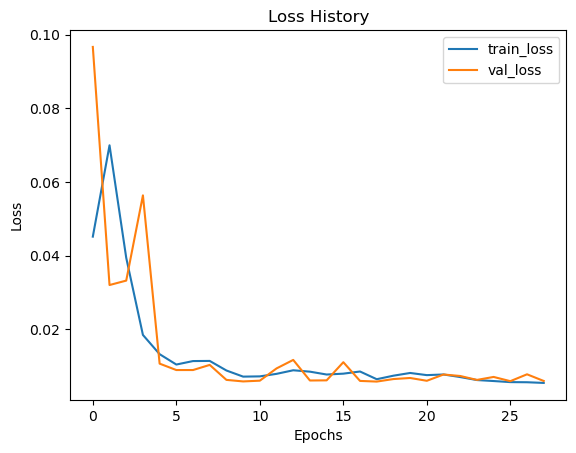

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

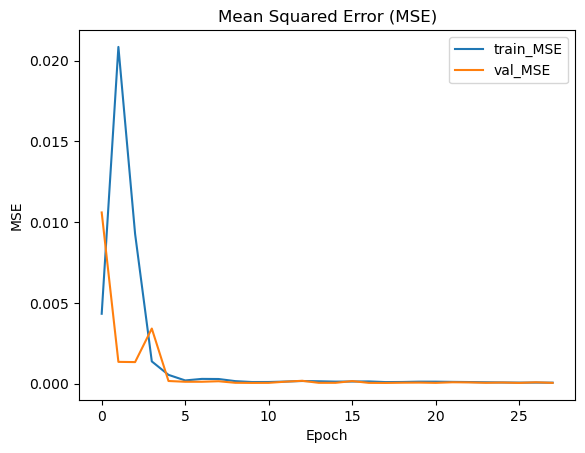

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

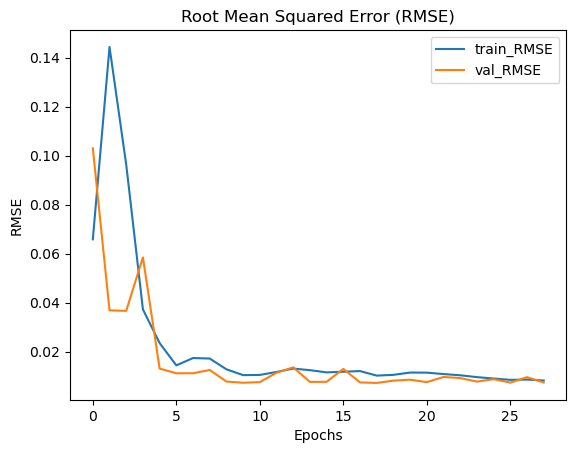

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

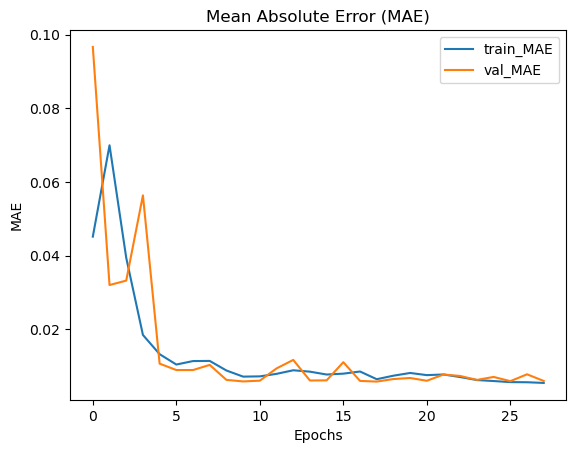

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

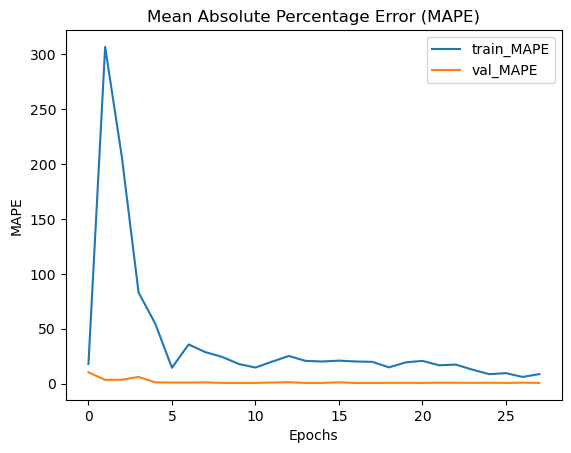

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 20:12:55.761294: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7598, 4, 3)
Labels Shape: (7598, 1, 1)
Prediction Shape: (7598, 1, 10)


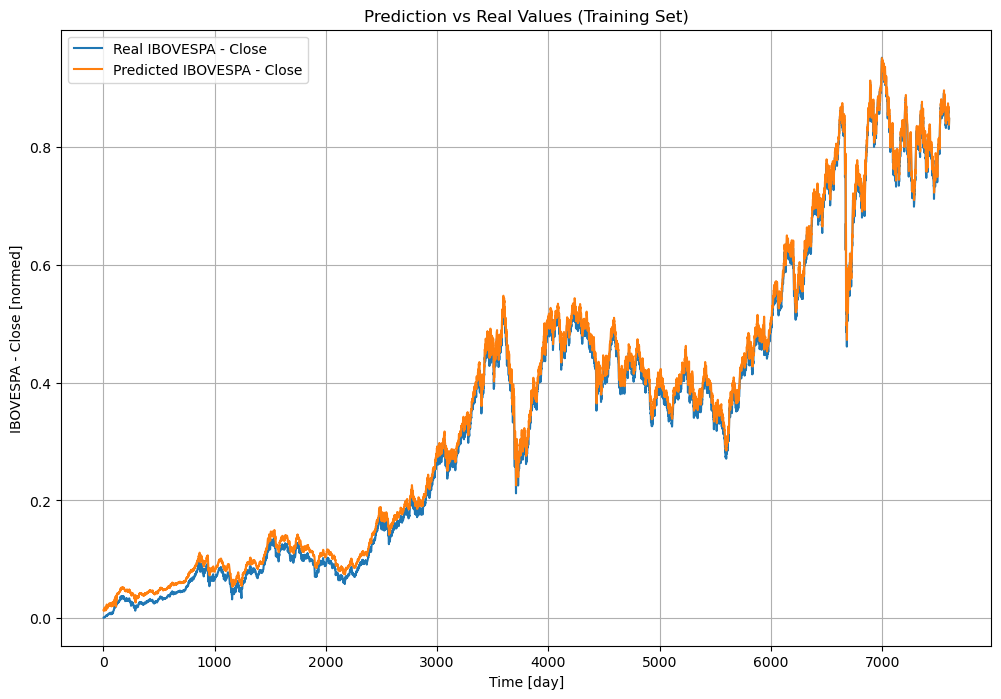

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (257, 4, 3)
Labels Shape: (257, 1, 1)
Prediction Shape: (257, 1, 10)


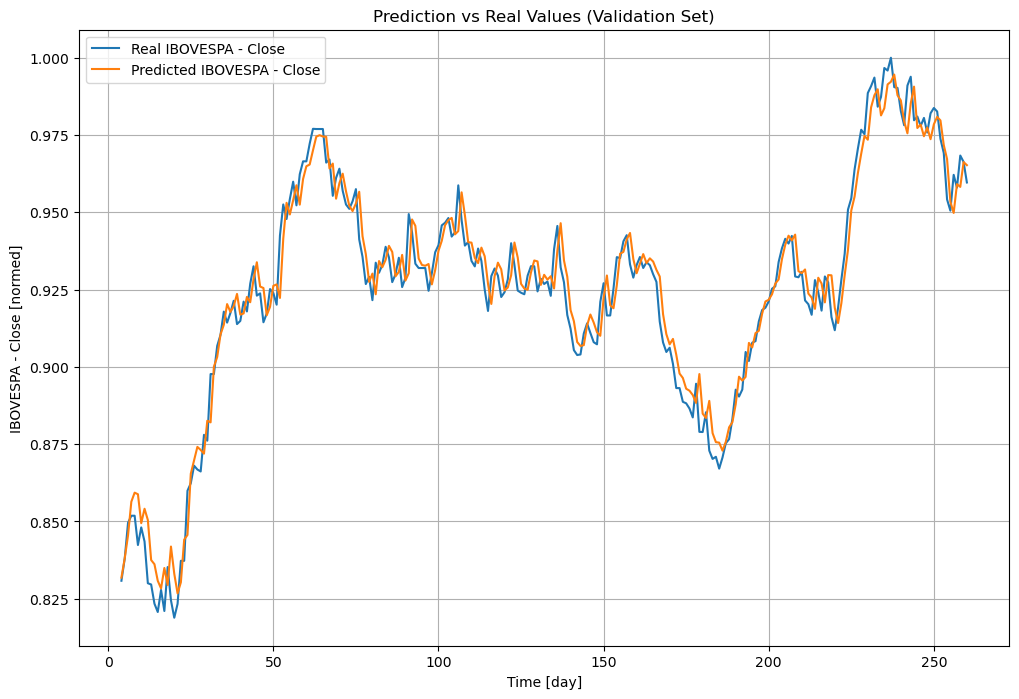

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (125, 4, 3)
Labels Shape: (125, 1, 1)
Prediction Shape: (125, 1, 10)


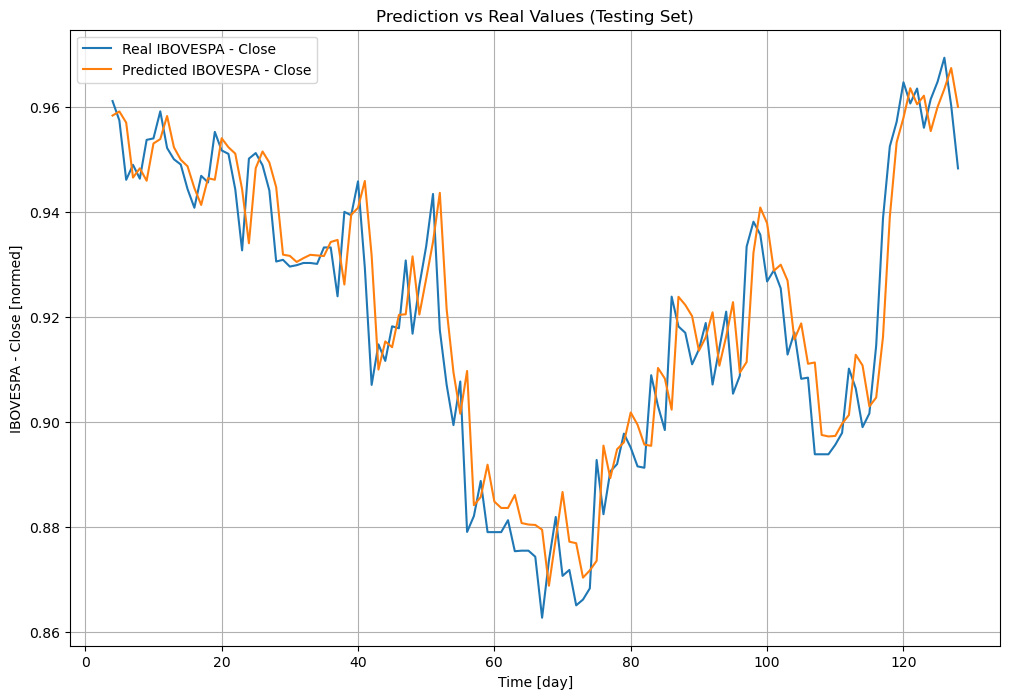

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

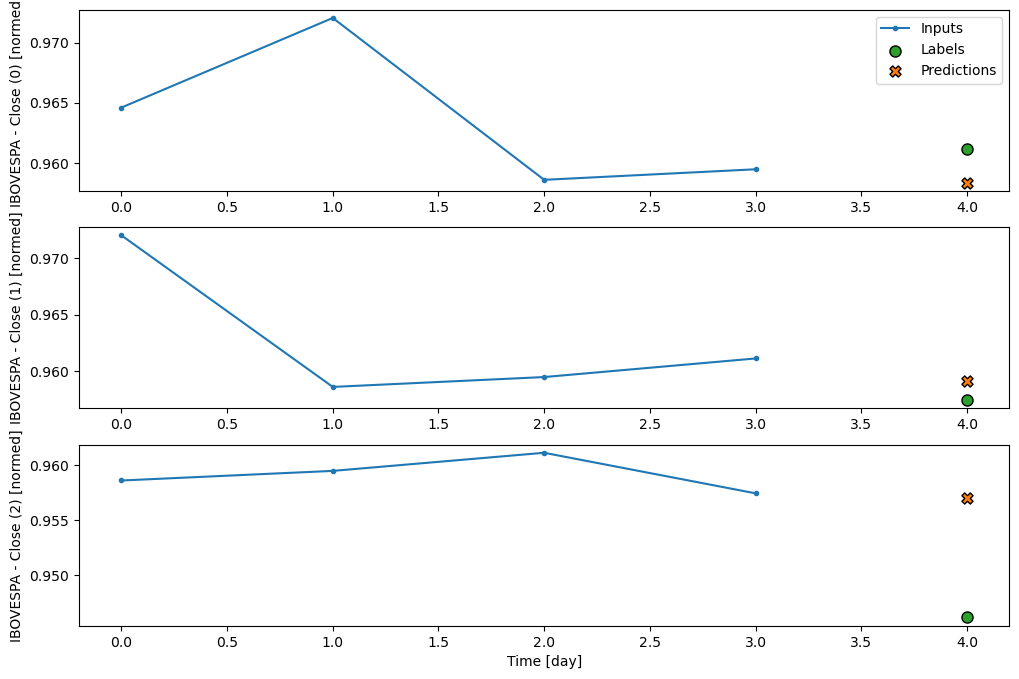

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:0m:59s:420ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[[0.9583516 , 0.9583516 , 0.9583516 , ..., 0.9583516 ,
         0.9583516 , 0.9583516 ]],

       [[0.9591317 , 0.9591317 , 0.9591317 , ..., 0.9591317 ,
         0.9591317 , 0.9591317 ]],

       [[0.95700216, 0.95700216, 0.95700216, ..., 0.95700216,
         0.95700216, 0.95700216]],

       ...,

       [[0.9634211 , 0.9634211 , 0.9634211 , ..., 0.9634211 ,
         0.9634211 , 0.9634211 ]],

       [[0.9674065 , 0.9674065 , 0.9674065 , ..., 0.9674065 ,
         0.9674065 , 0.9674065 ]],

       [[0.95999324, 0.95999324, 0.95999324, ..., 0.95999324,
         0.95999324, 0.95999324]]], shape=(125, 1, 10), dtype=float32)

In [53]:
prediction.shape

(125, 1, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')